# 데이터 시각화 (Visualization)

주택가격 데이터셋 로드

In [ ]:
import pandas as pd
df = pd.read_excel('kc_house_data.xlsx')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


시각화 패키지 (matplotlib, seaborn) 로드

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

데이터에 대한 기본정보 및 통계량 확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


전체 데이터를 히스토그램으로 그려보기

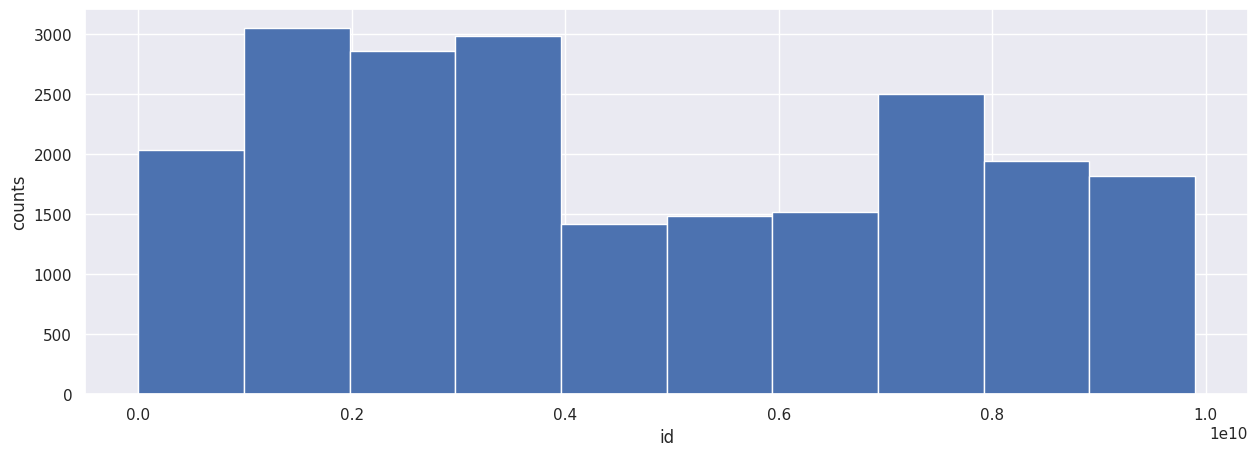

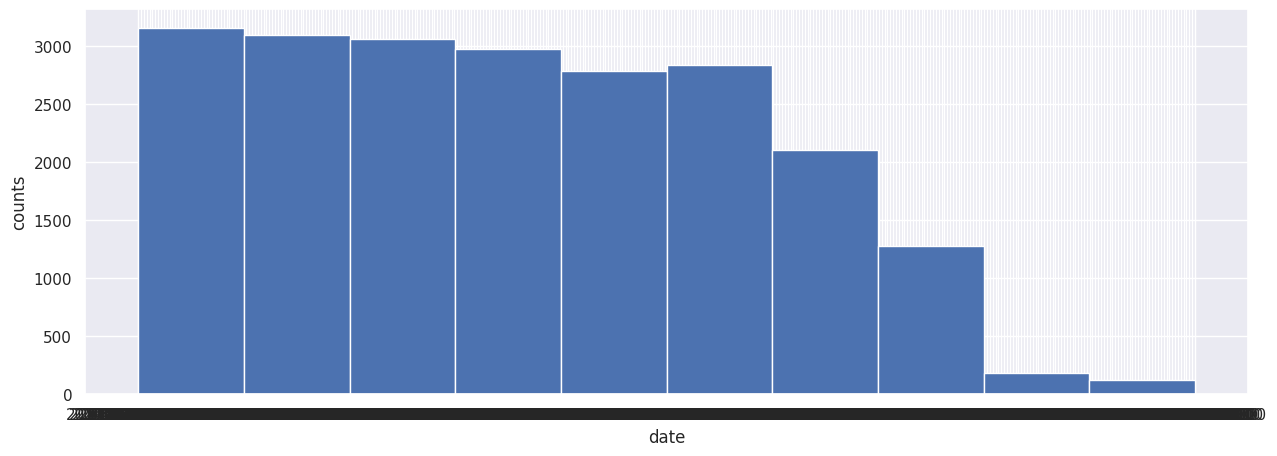

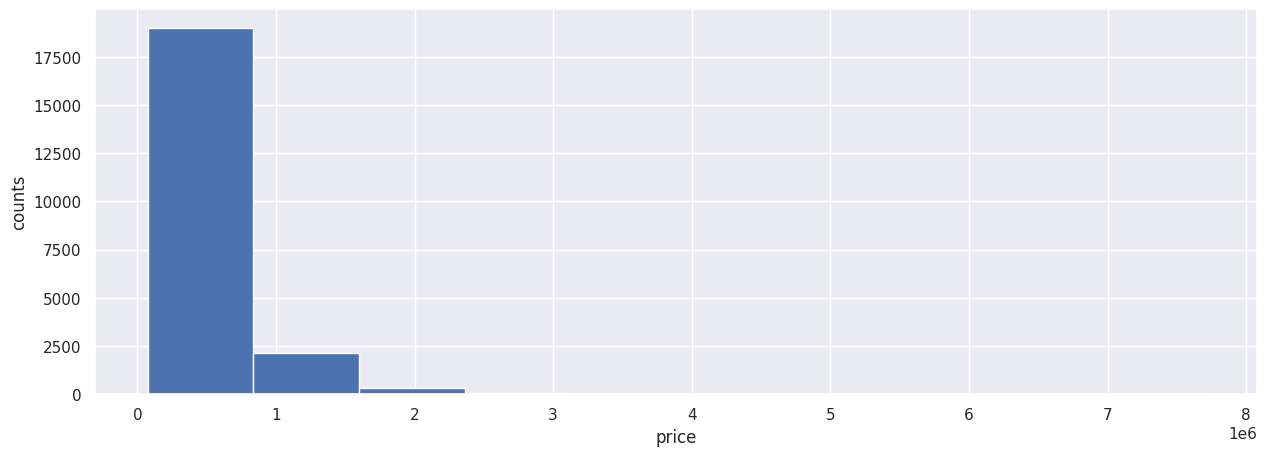

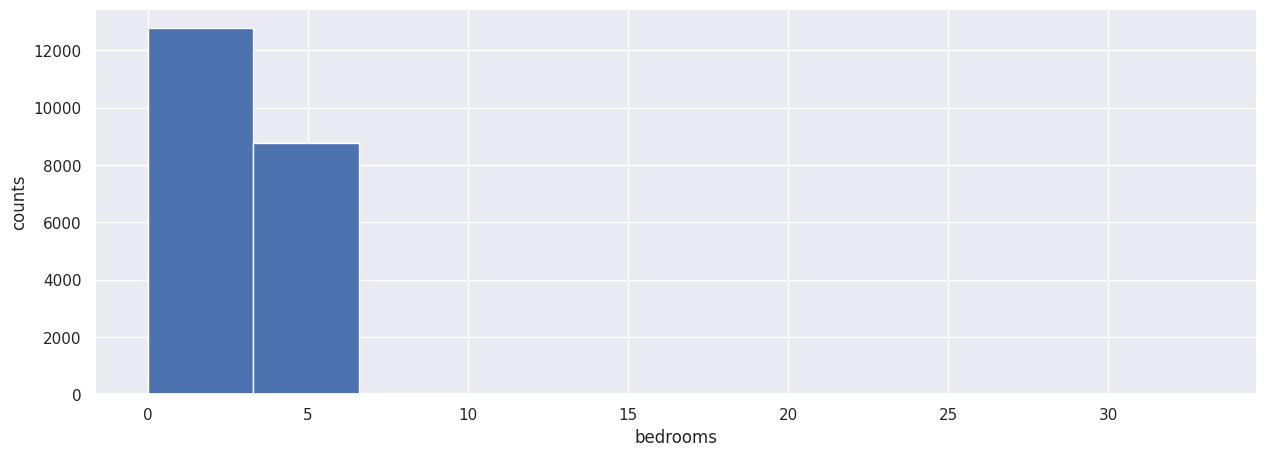

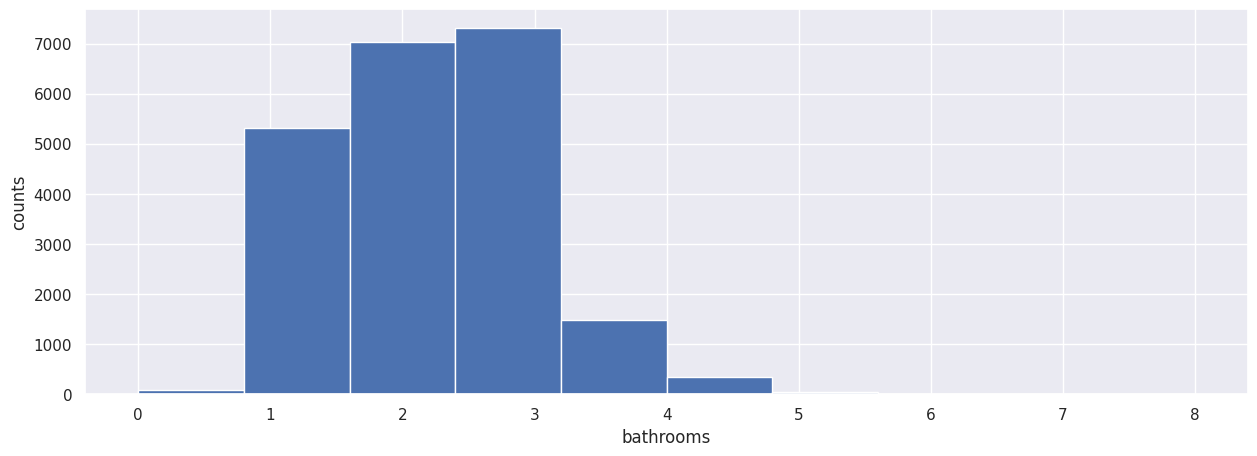

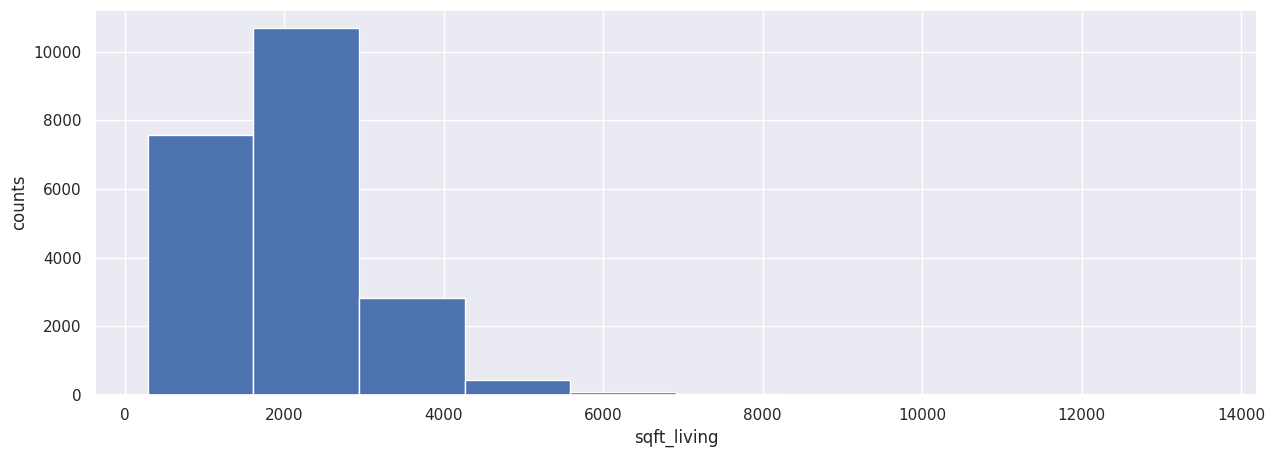

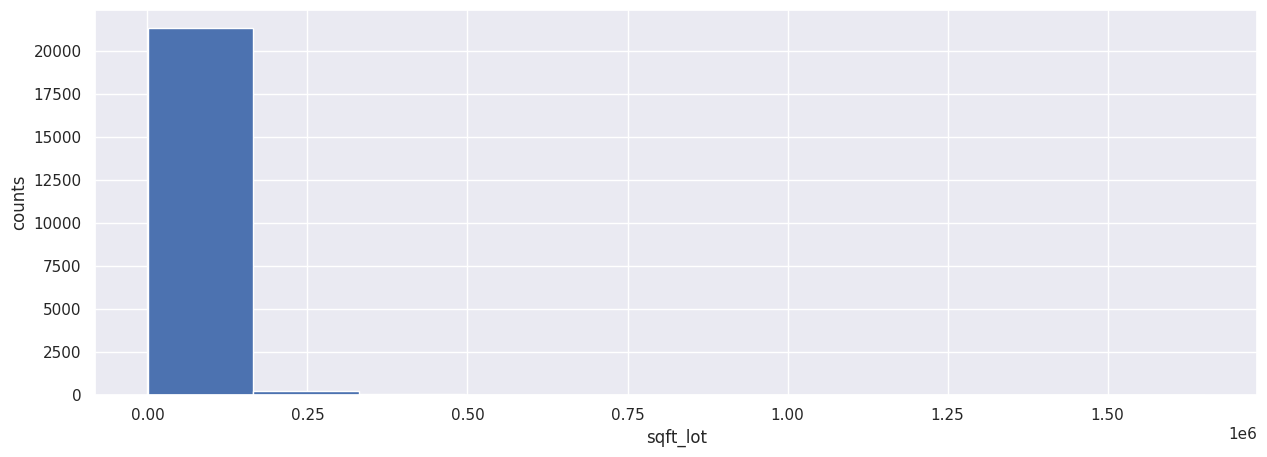

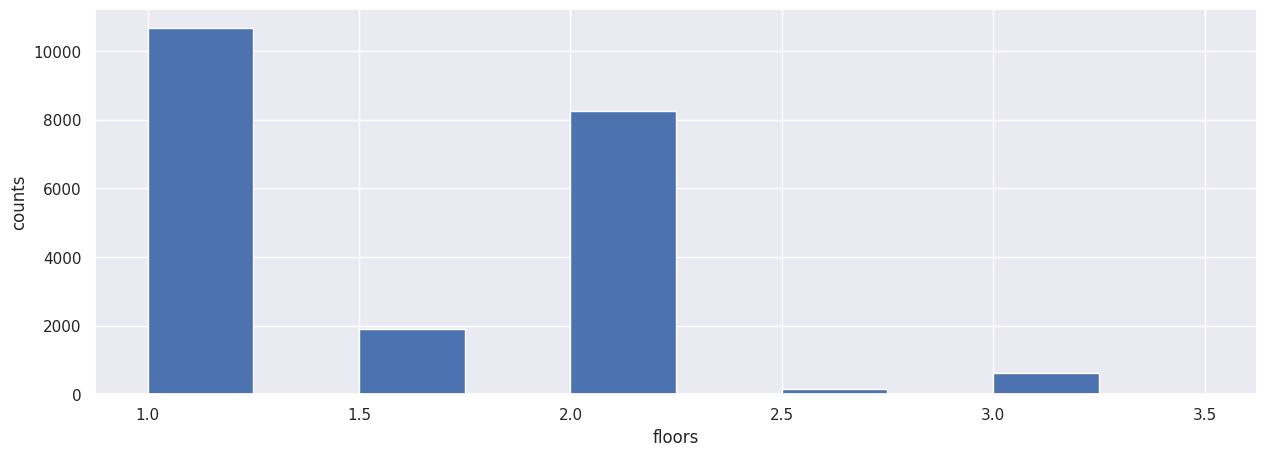

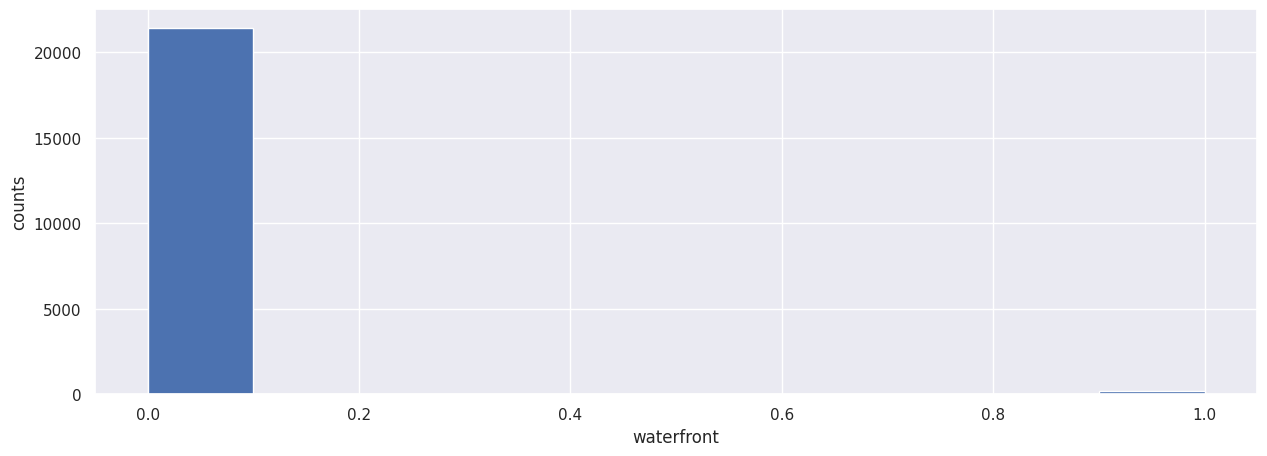

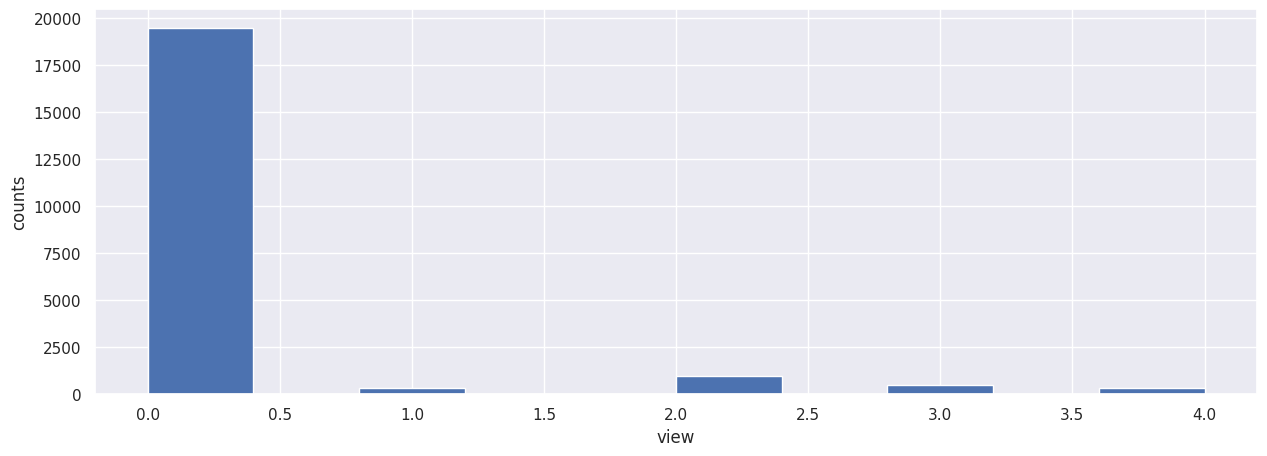

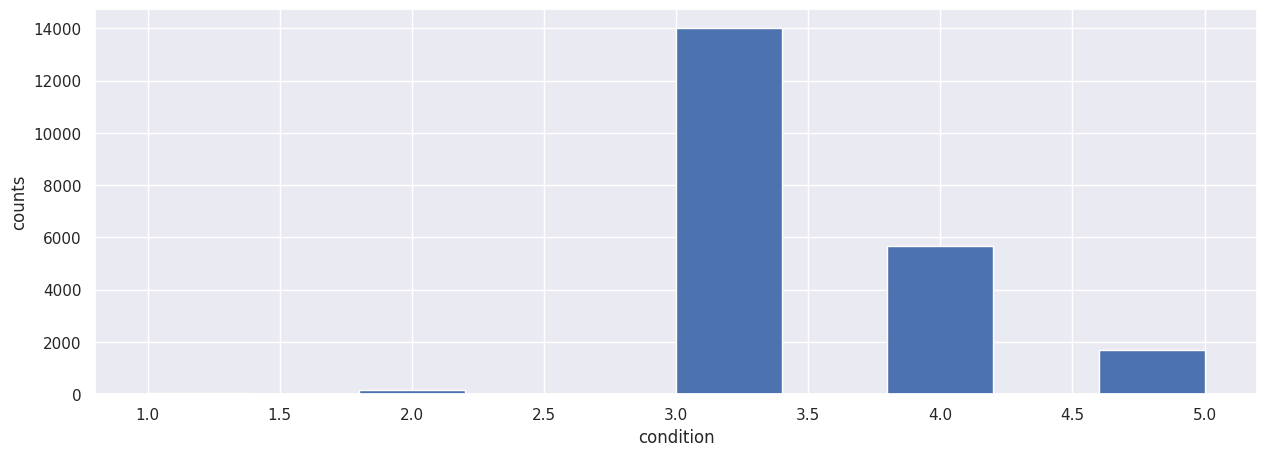

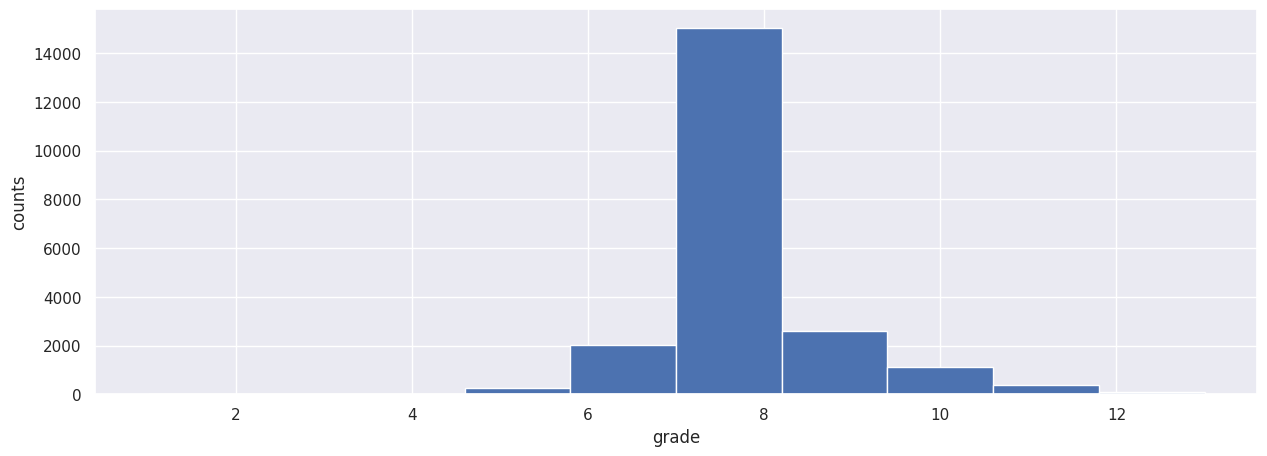

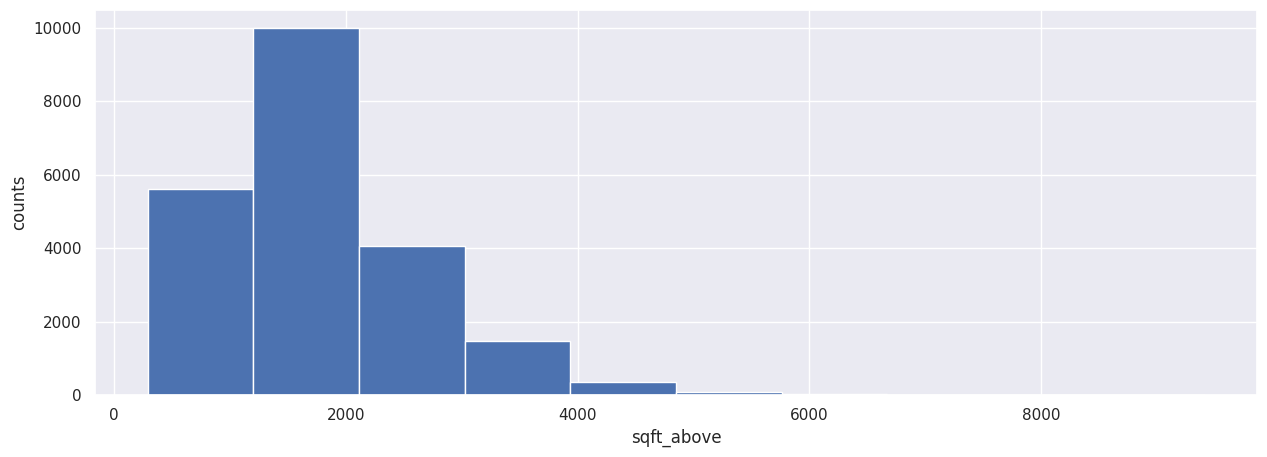

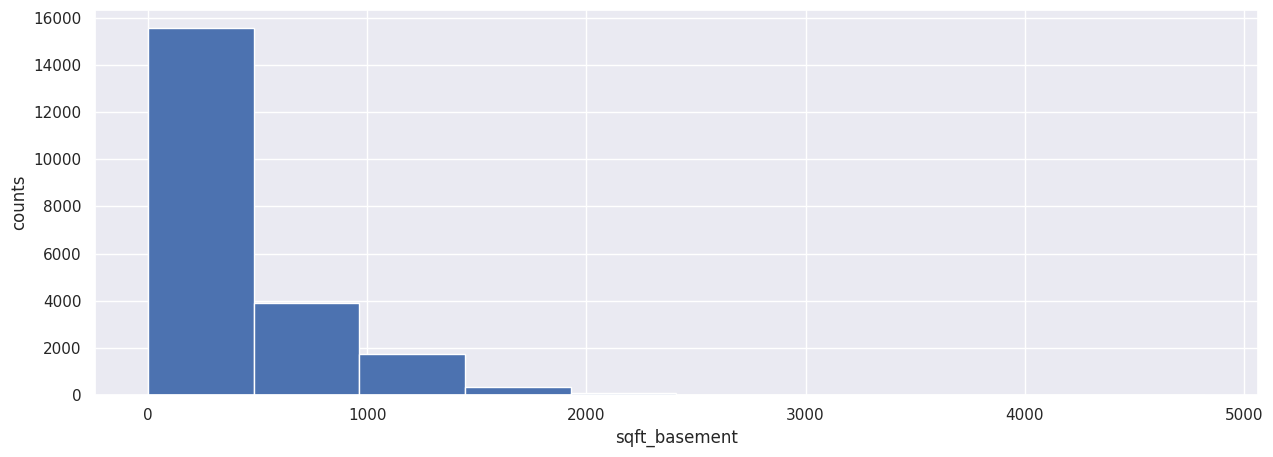

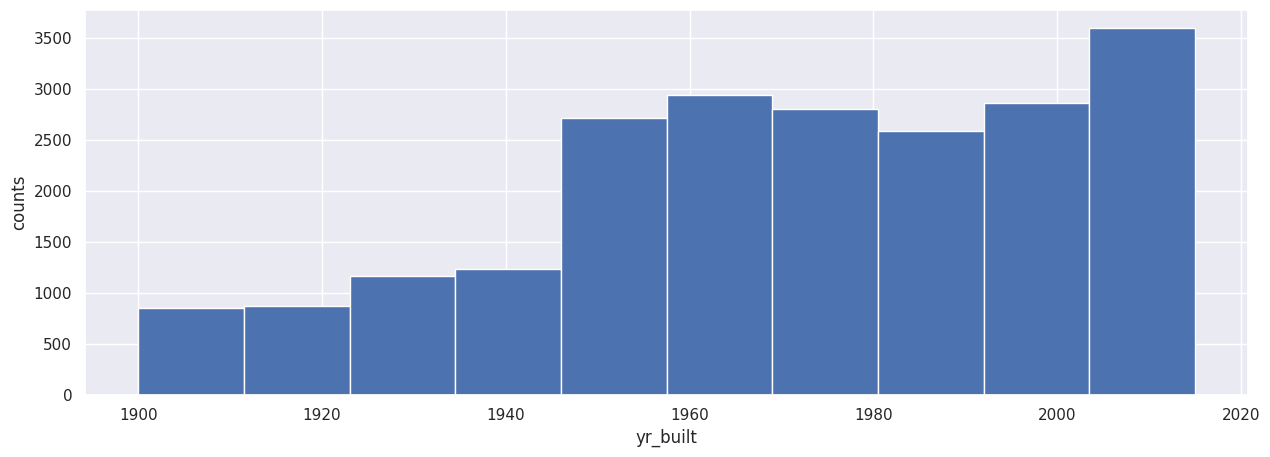

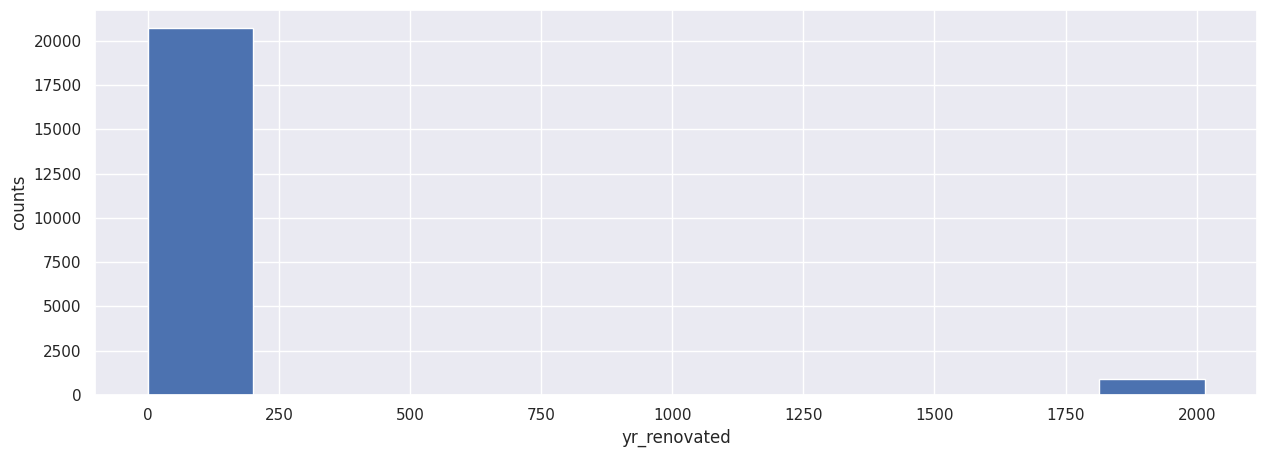

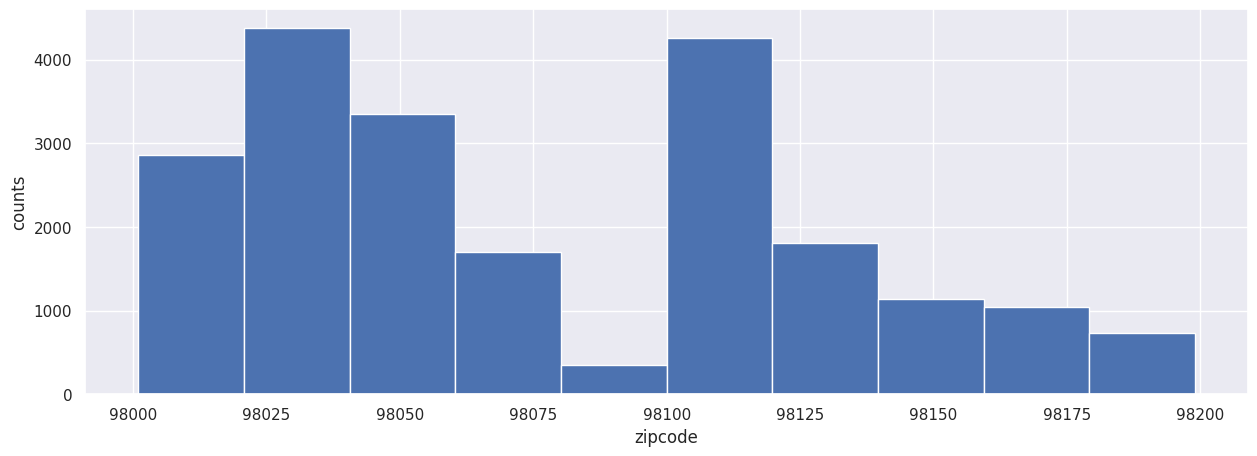

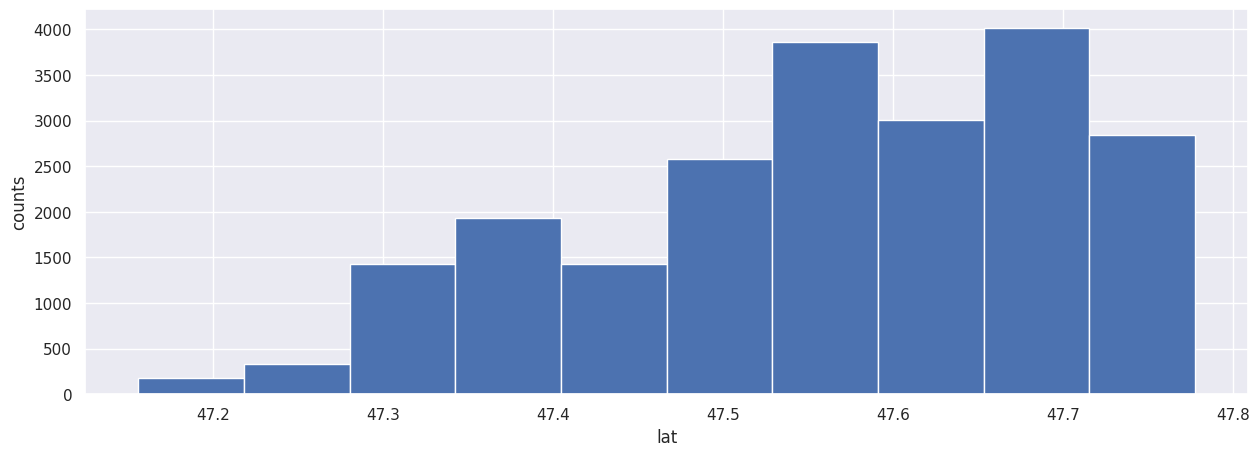

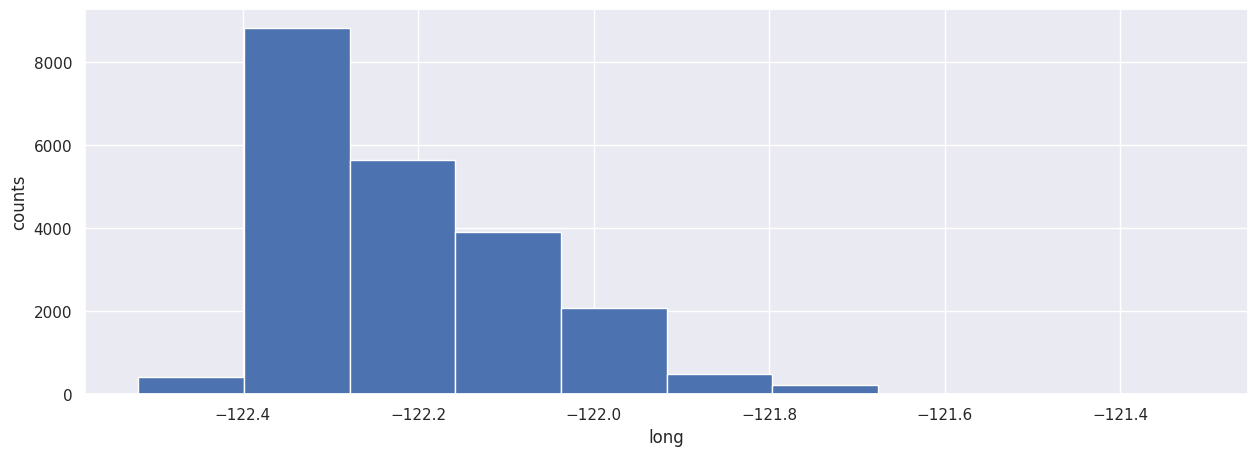

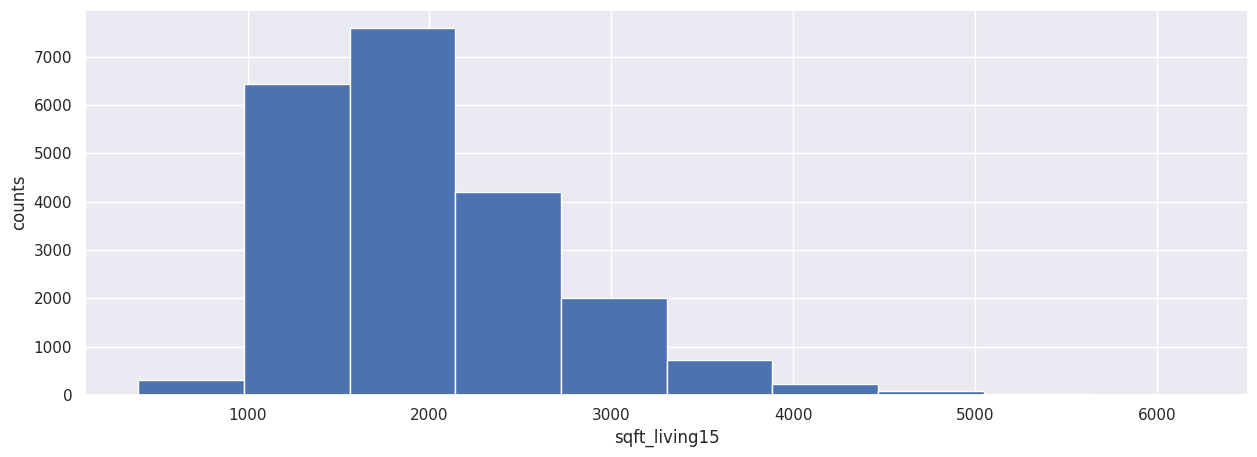

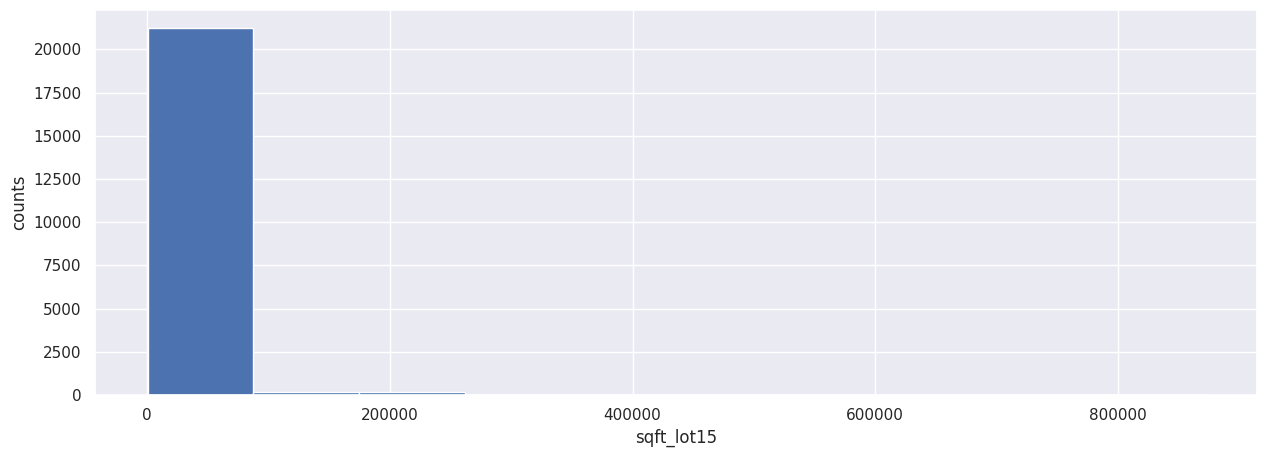

In [ ]:
# matplotlib
for i in df.columns:
    plt.hist(df[i])
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('counts')
    plt.show()

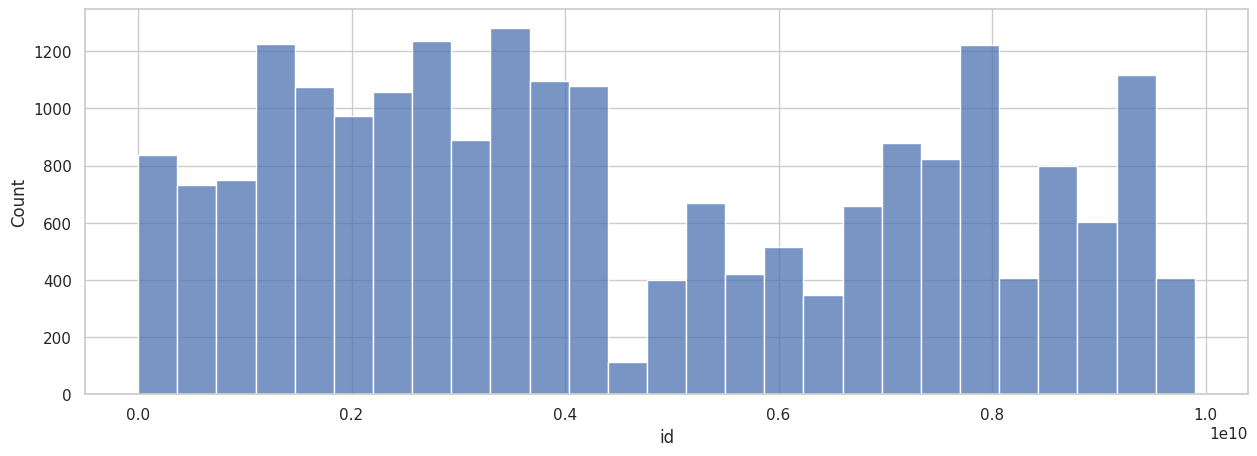

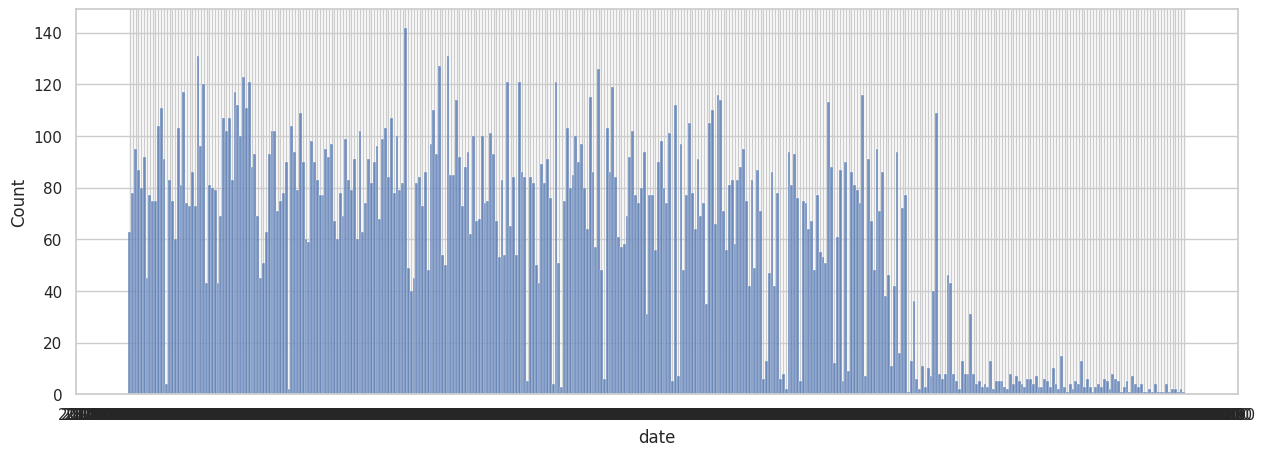

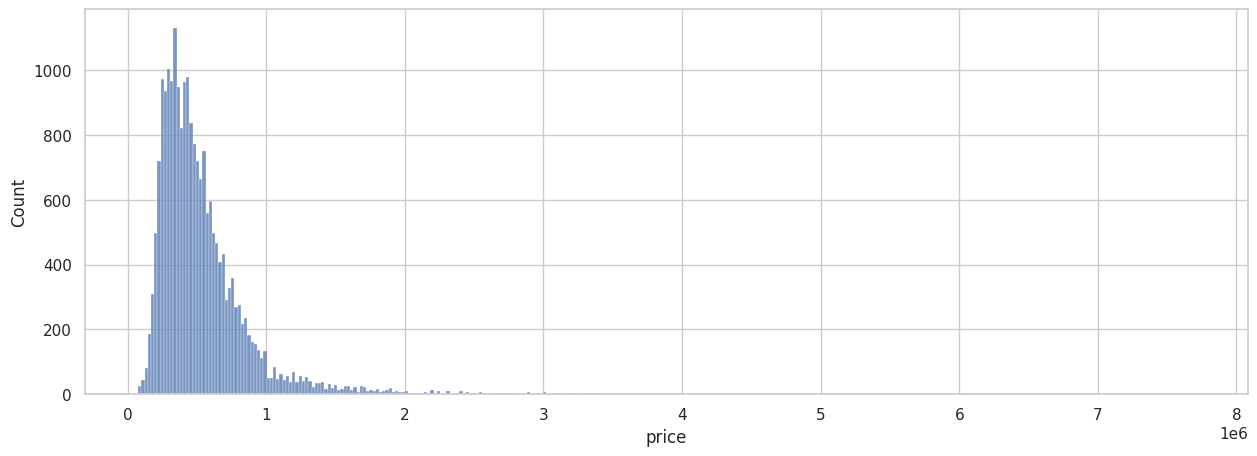

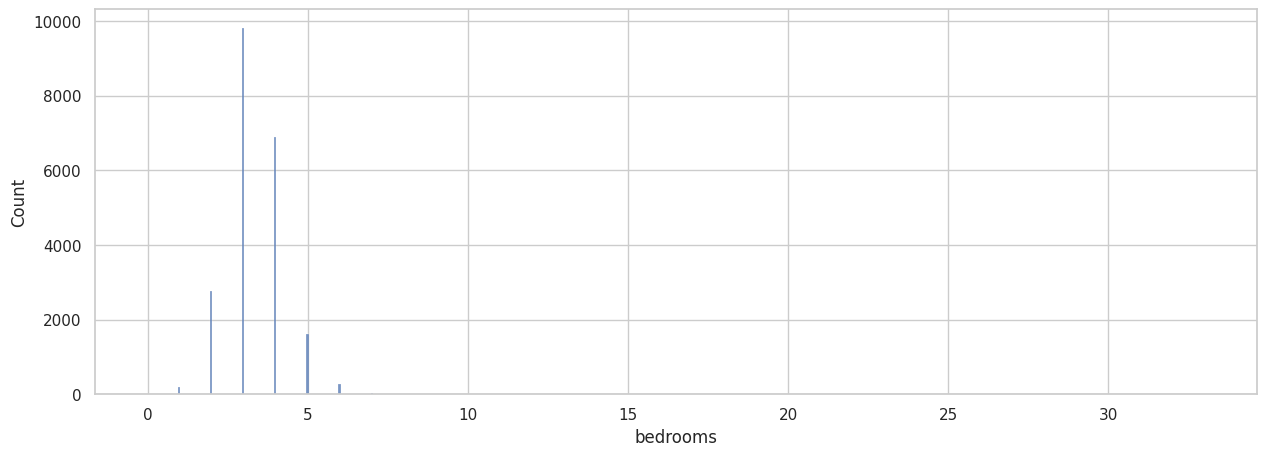

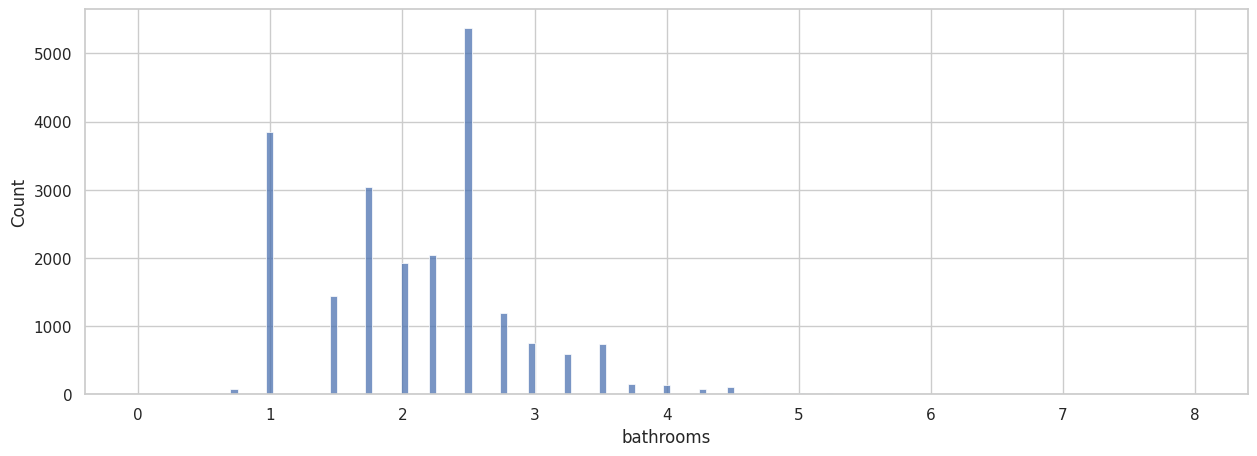

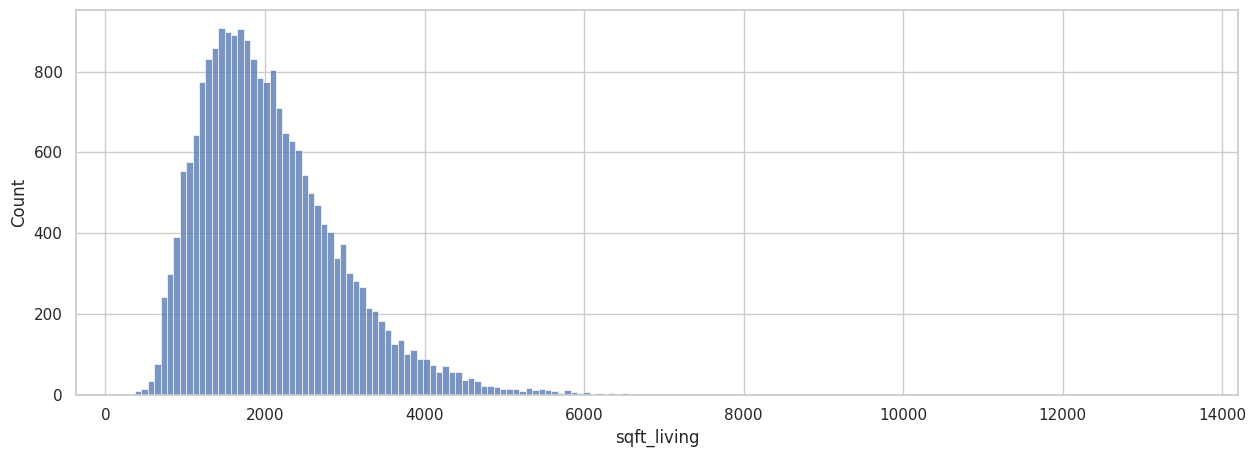

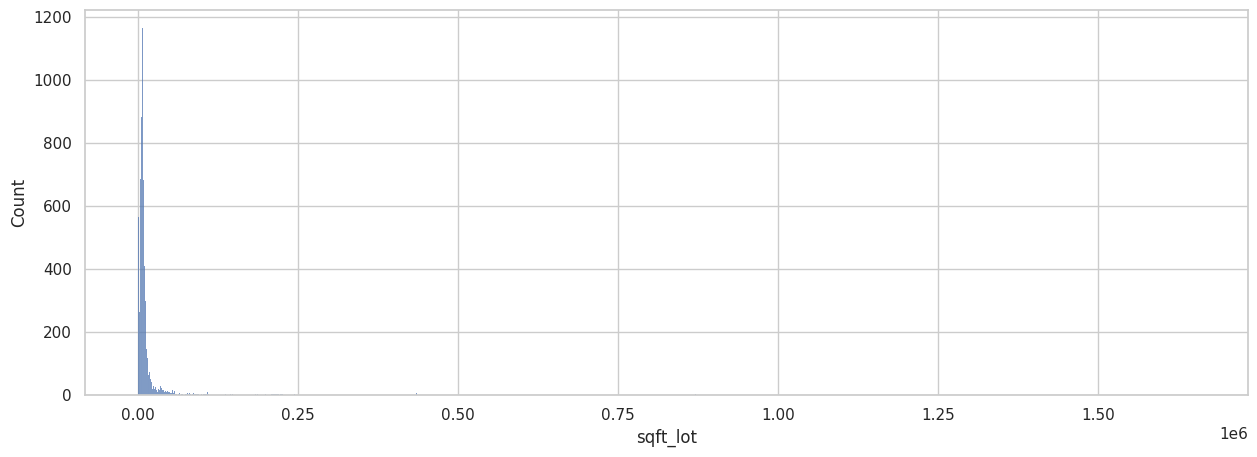

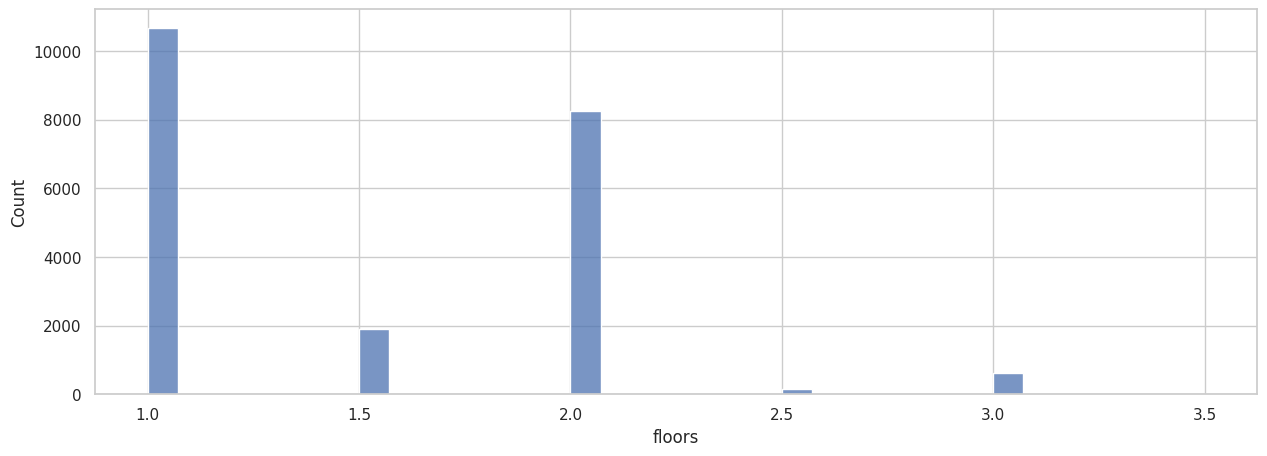

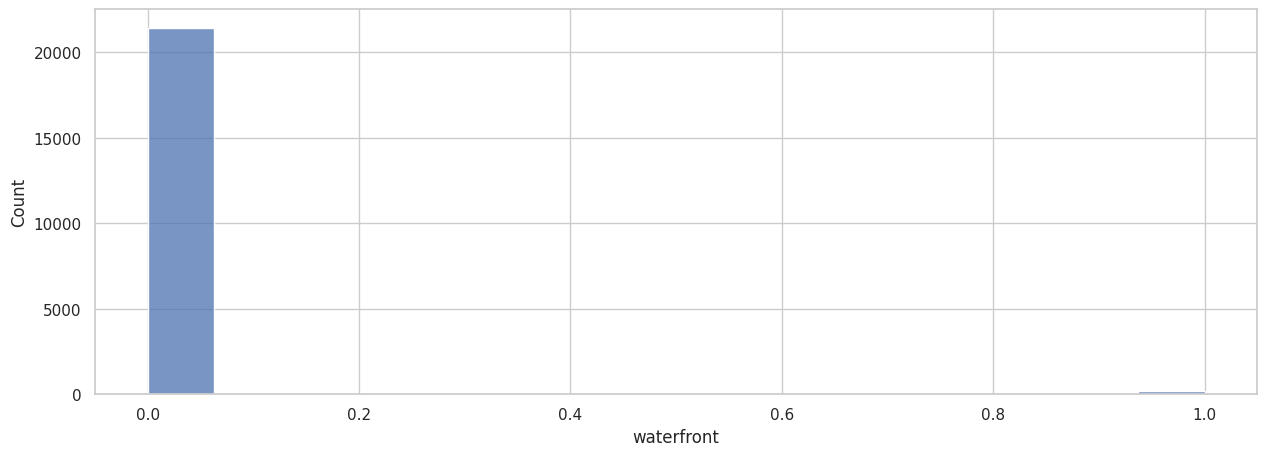

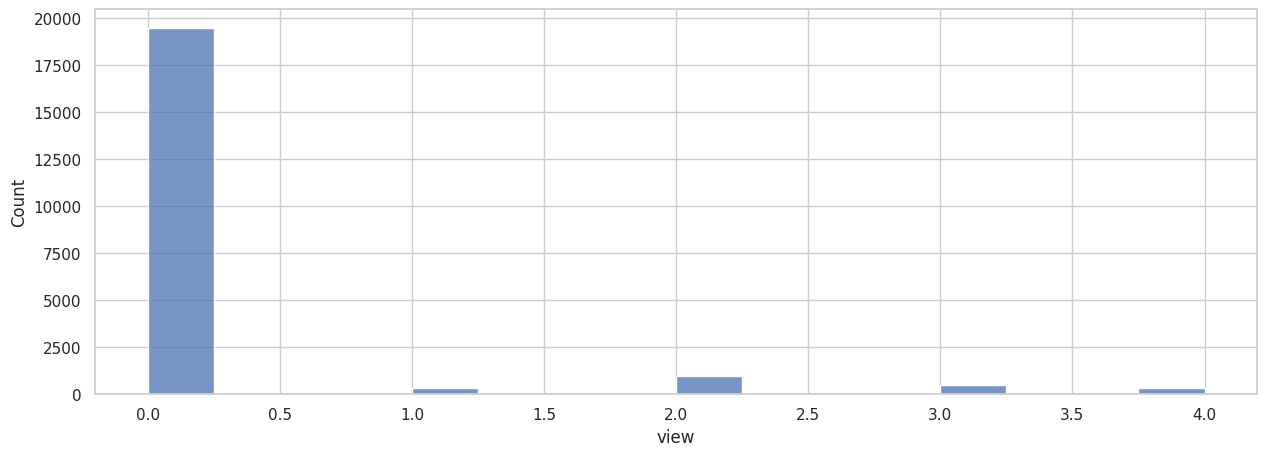

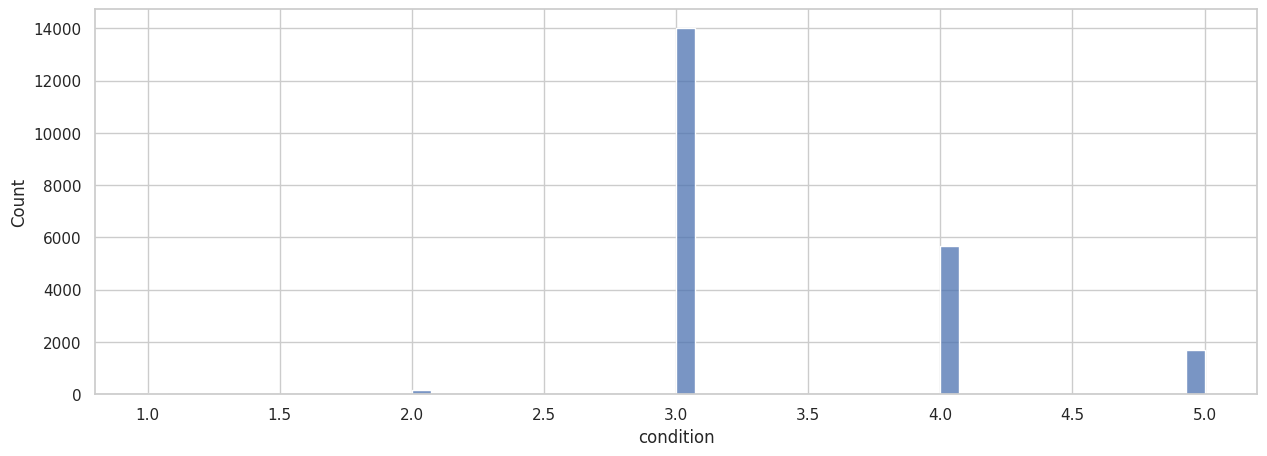

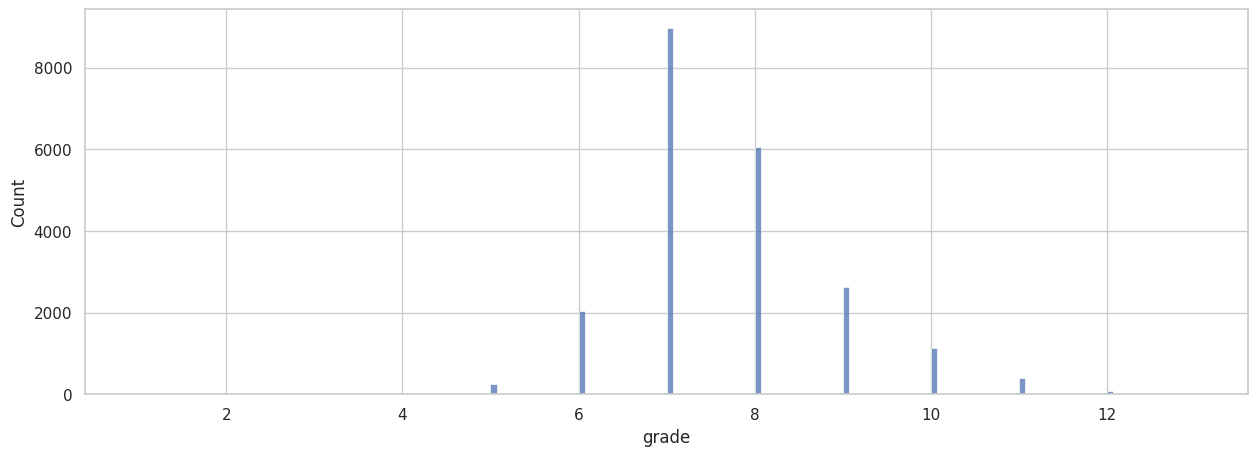

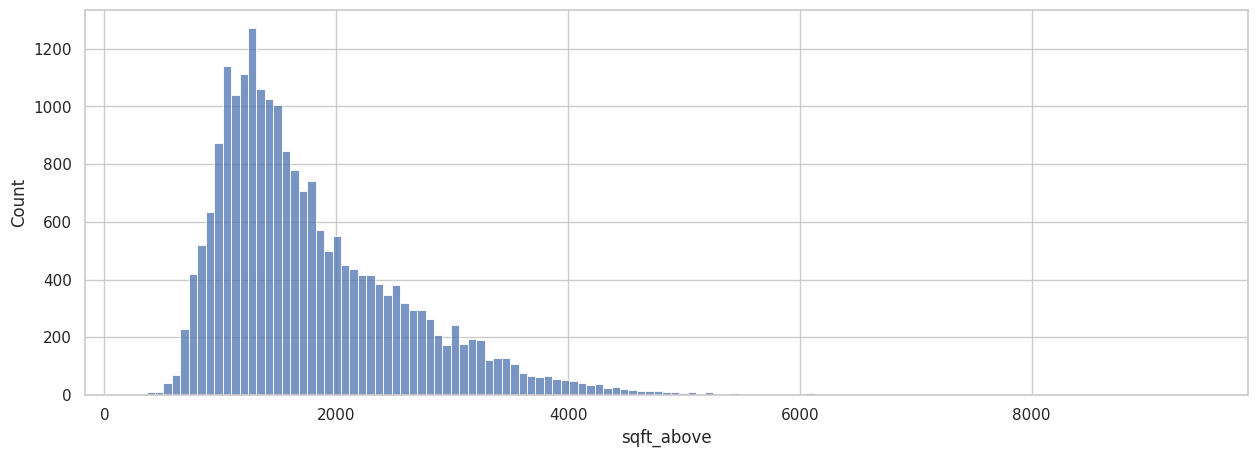

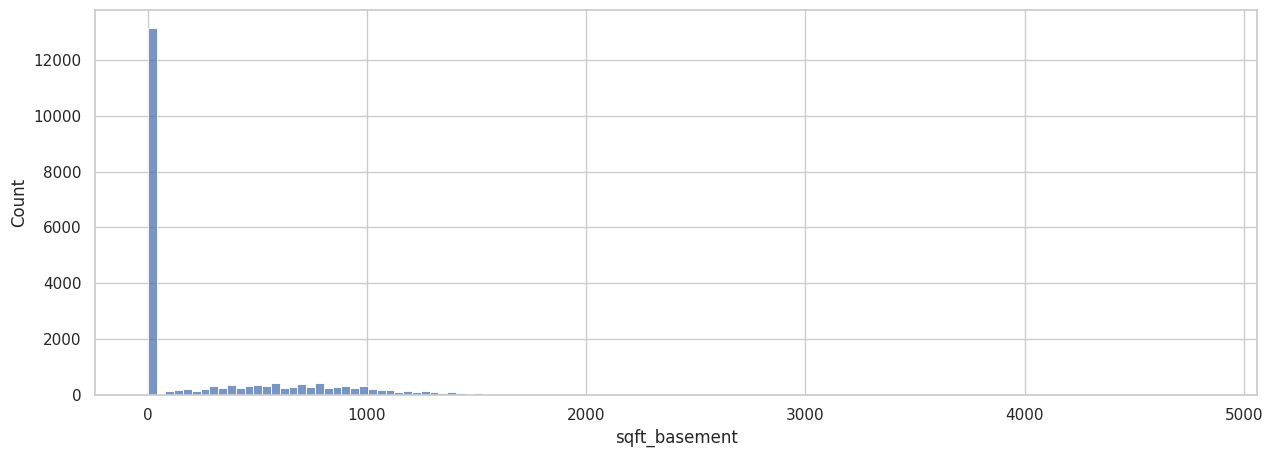

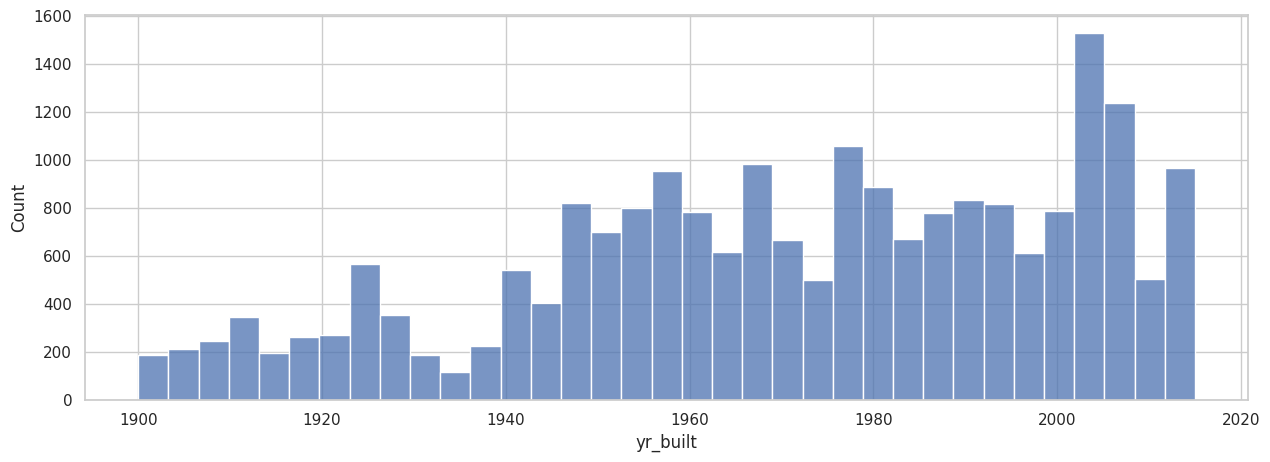

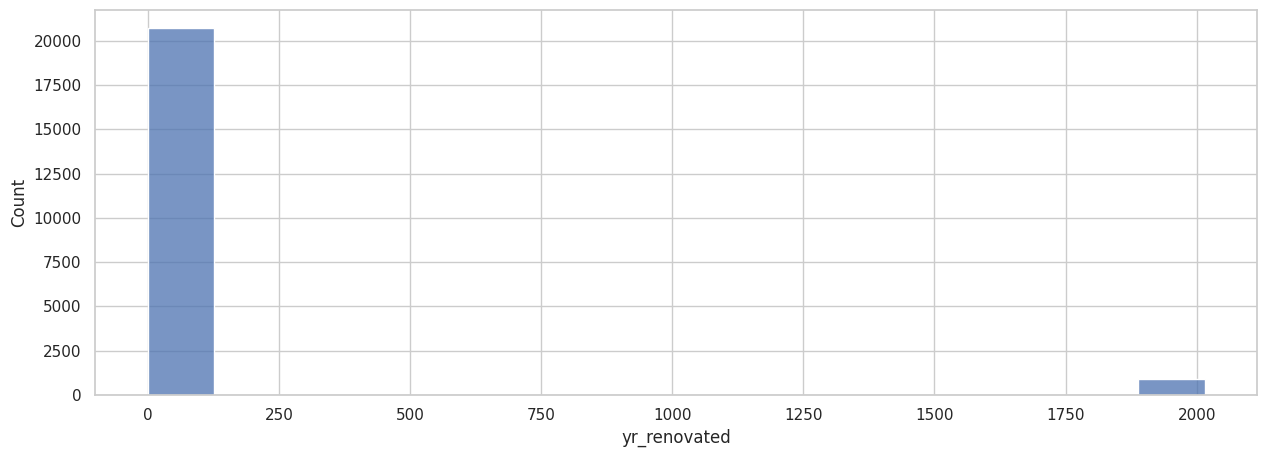

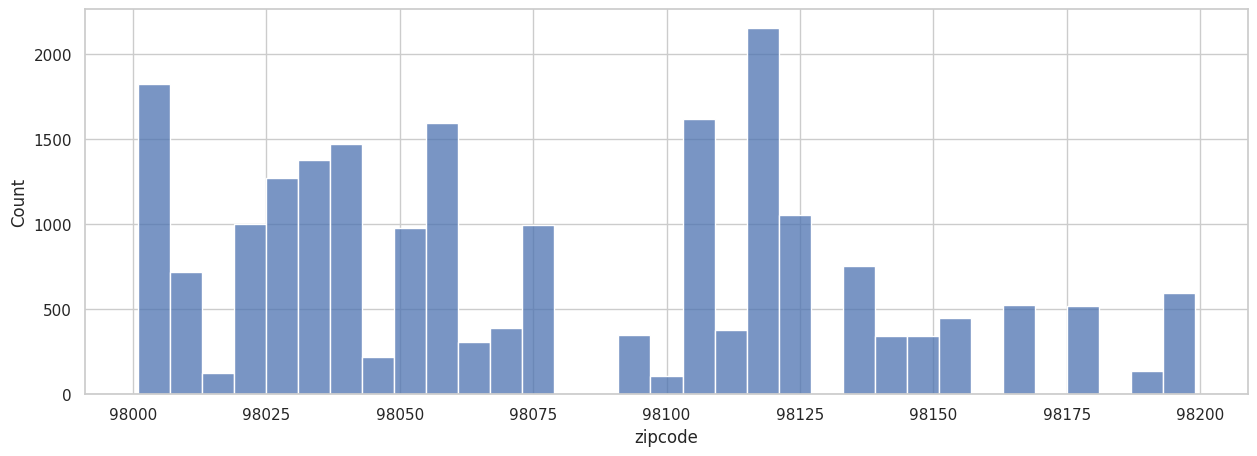

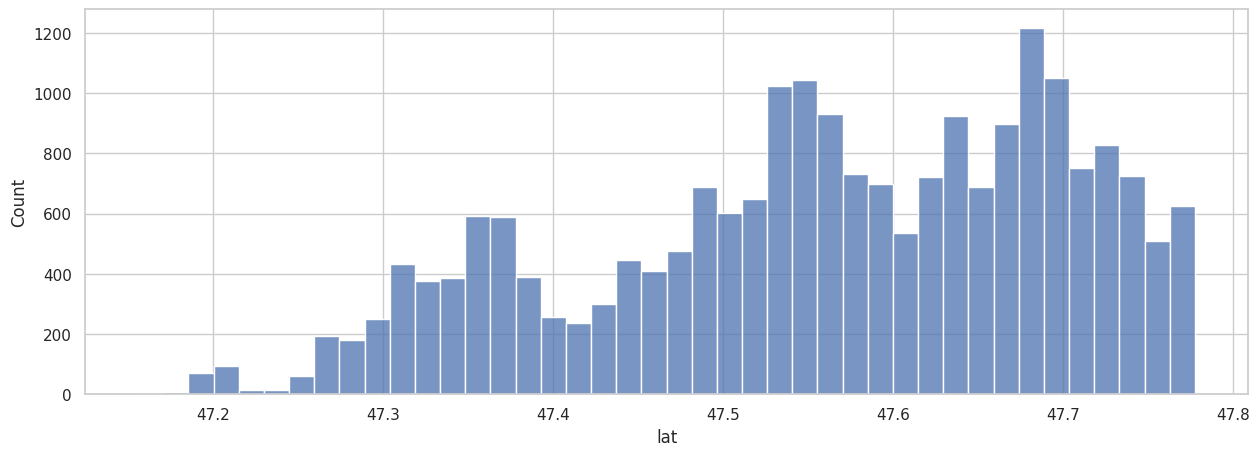

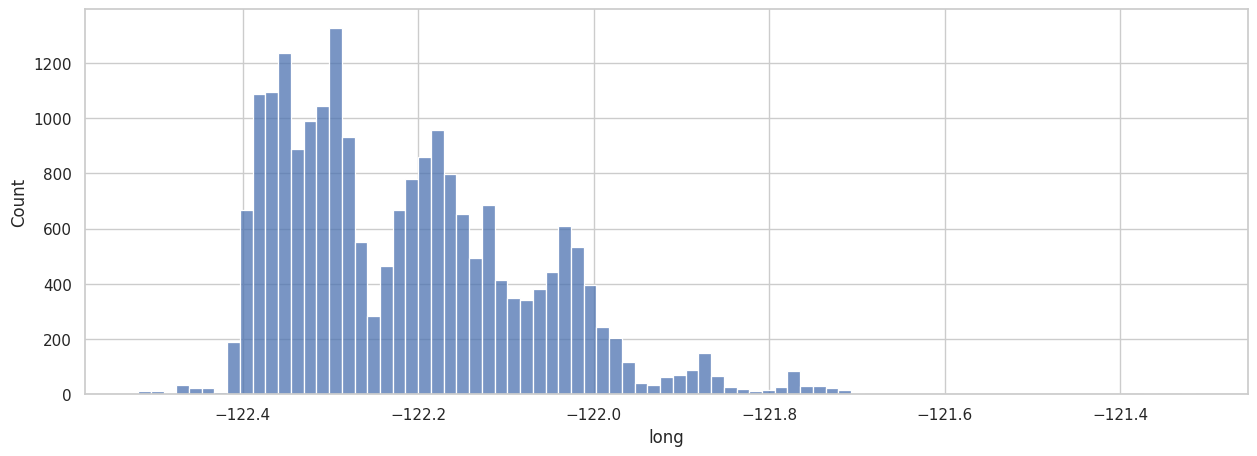

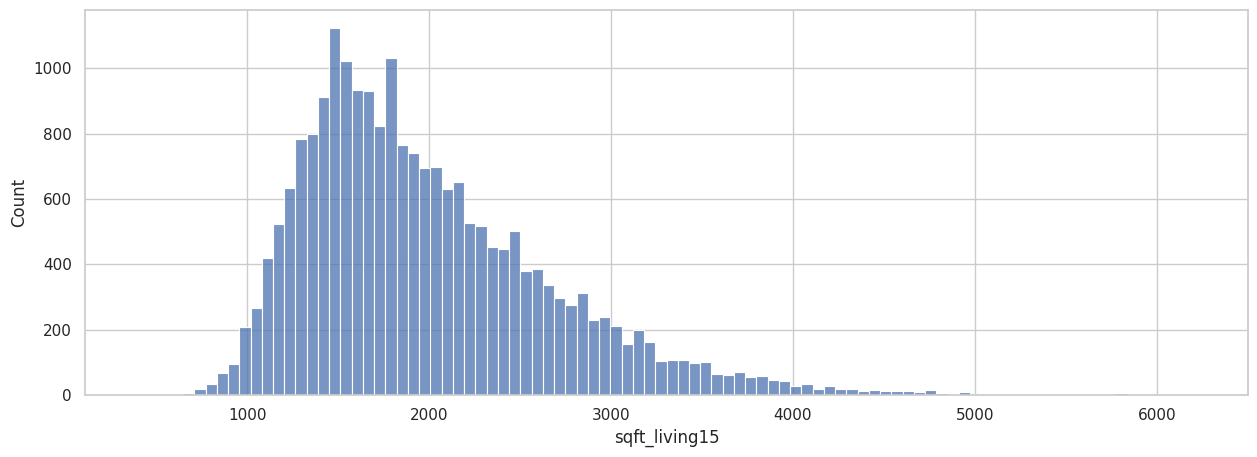

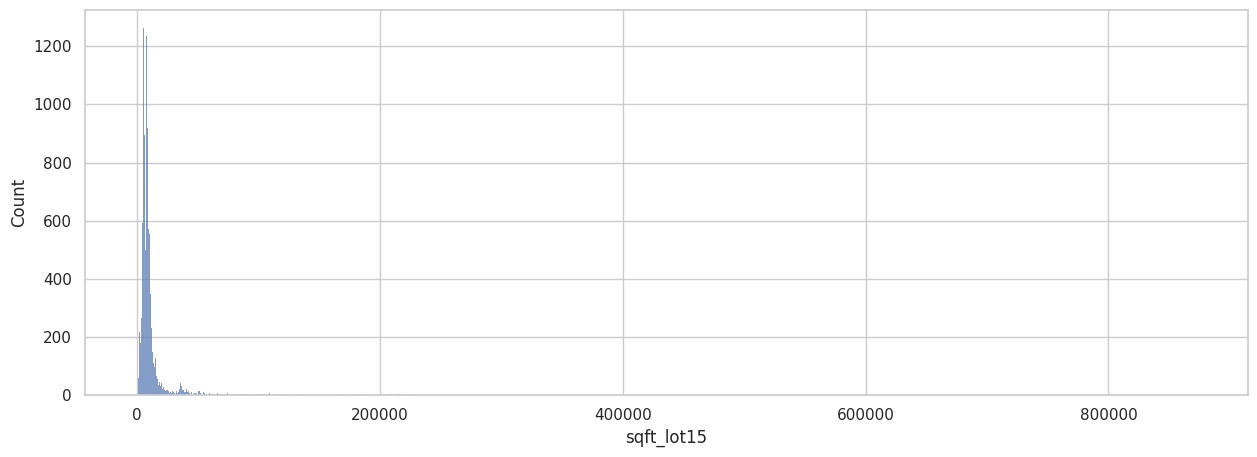

In [ ]:
# seaborn
sns.set_theme(style='whitegrid') # darkgrid, white, dark, ticks
for i in df.columns:
  sns.histplot(data=df[i])
  plt.show()

Boxplot으로 각 데이터에서 이상치 확인하기

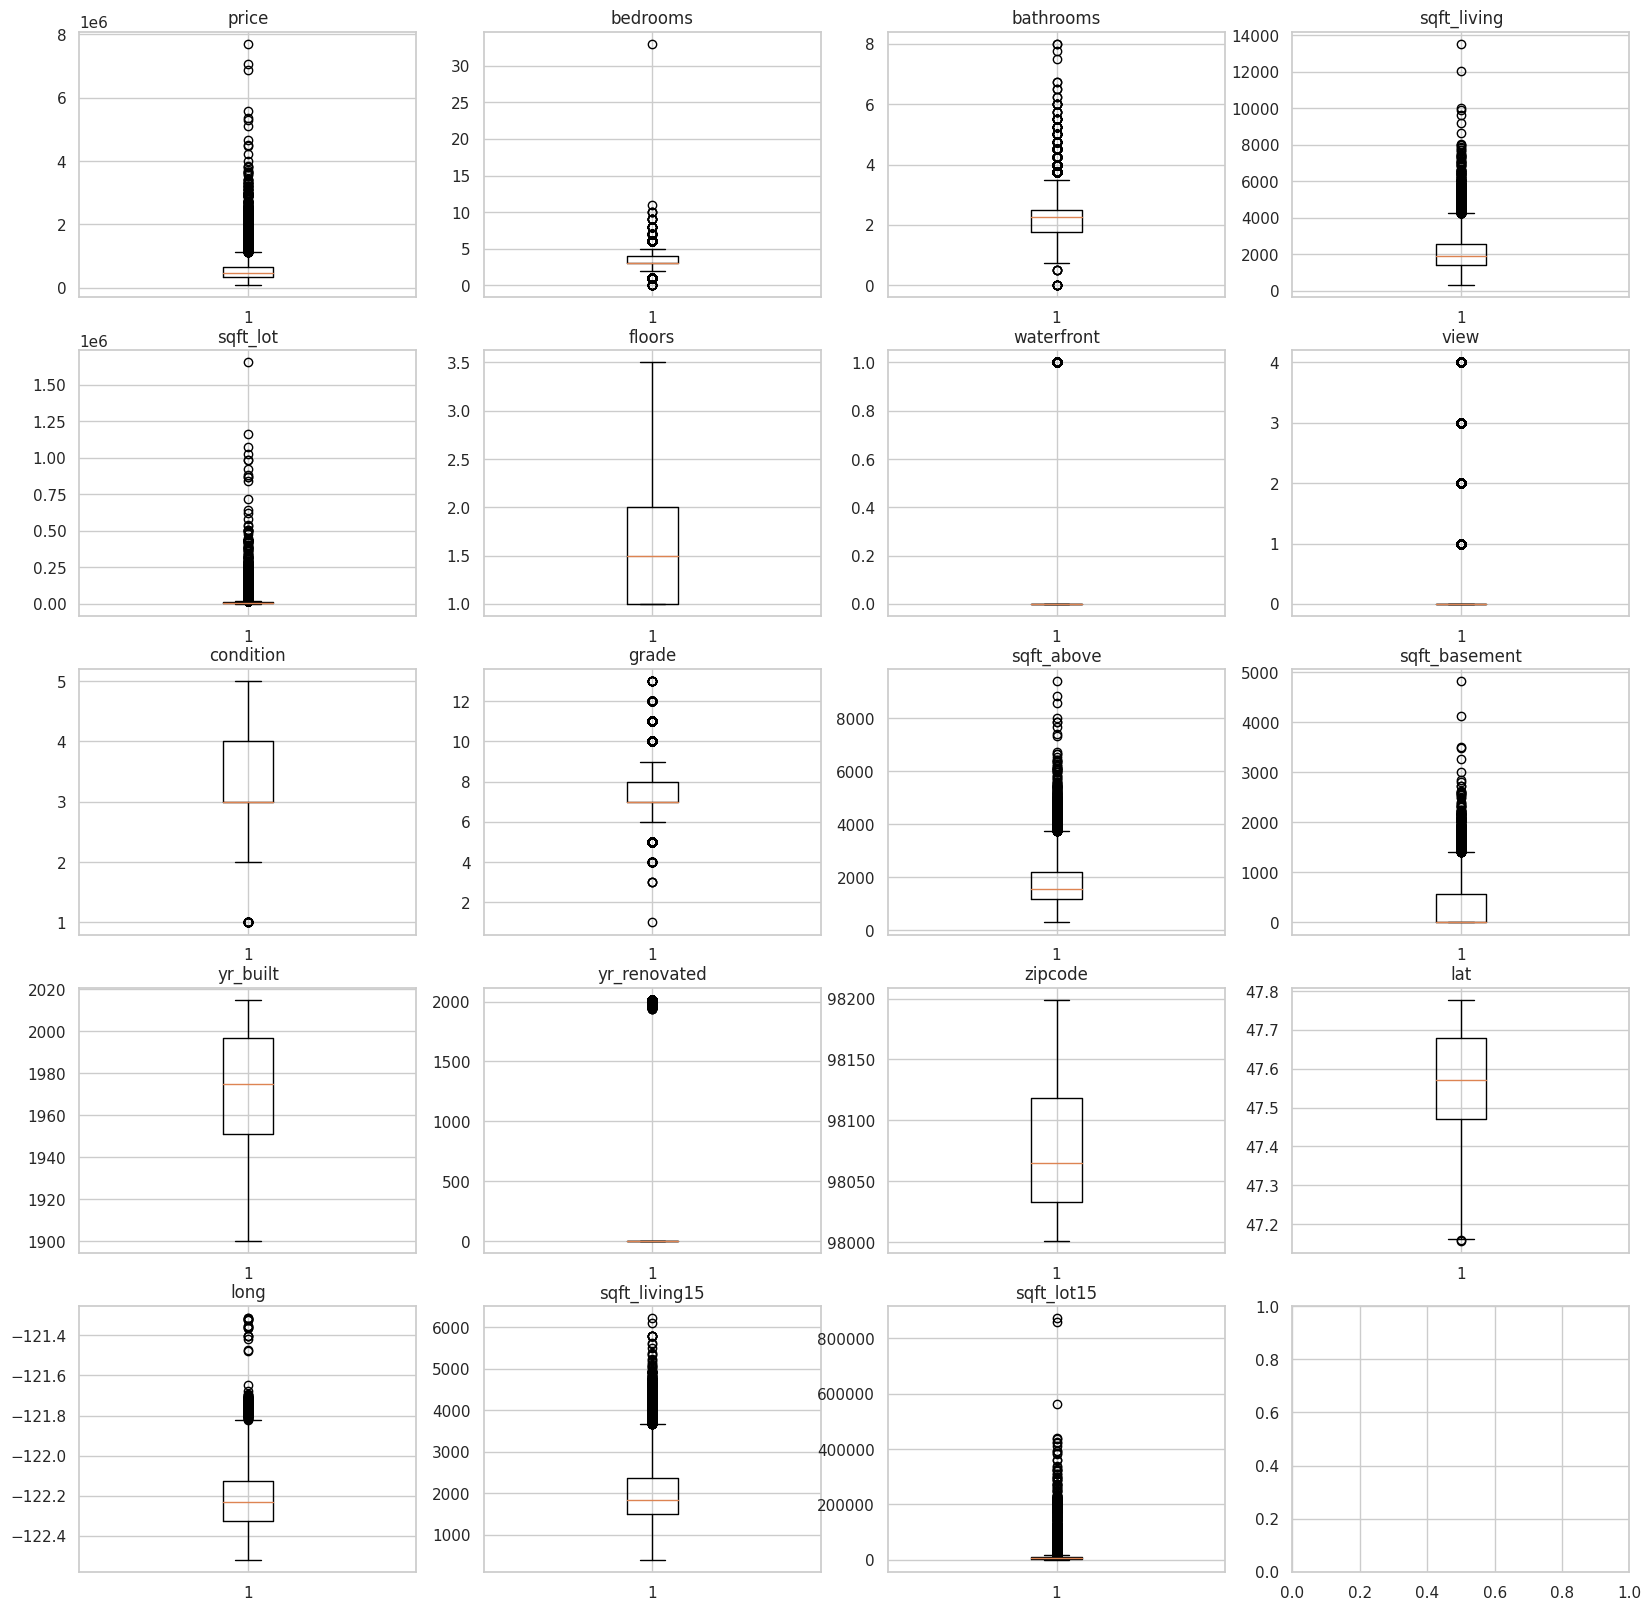

In [ ]:
# matplotlib
fig, axes = plt.subplots(5, 4, figsize = (20,20))
col_cnt = 1
col_names = df.columns.tolist()
for name in col_names:
  if name != 'id' and name != 'date':
    plt.subplot(5, 4, col_cnt)
    plt.boxplot(df[name])
    plt.title(name)
    col_cnt += 1

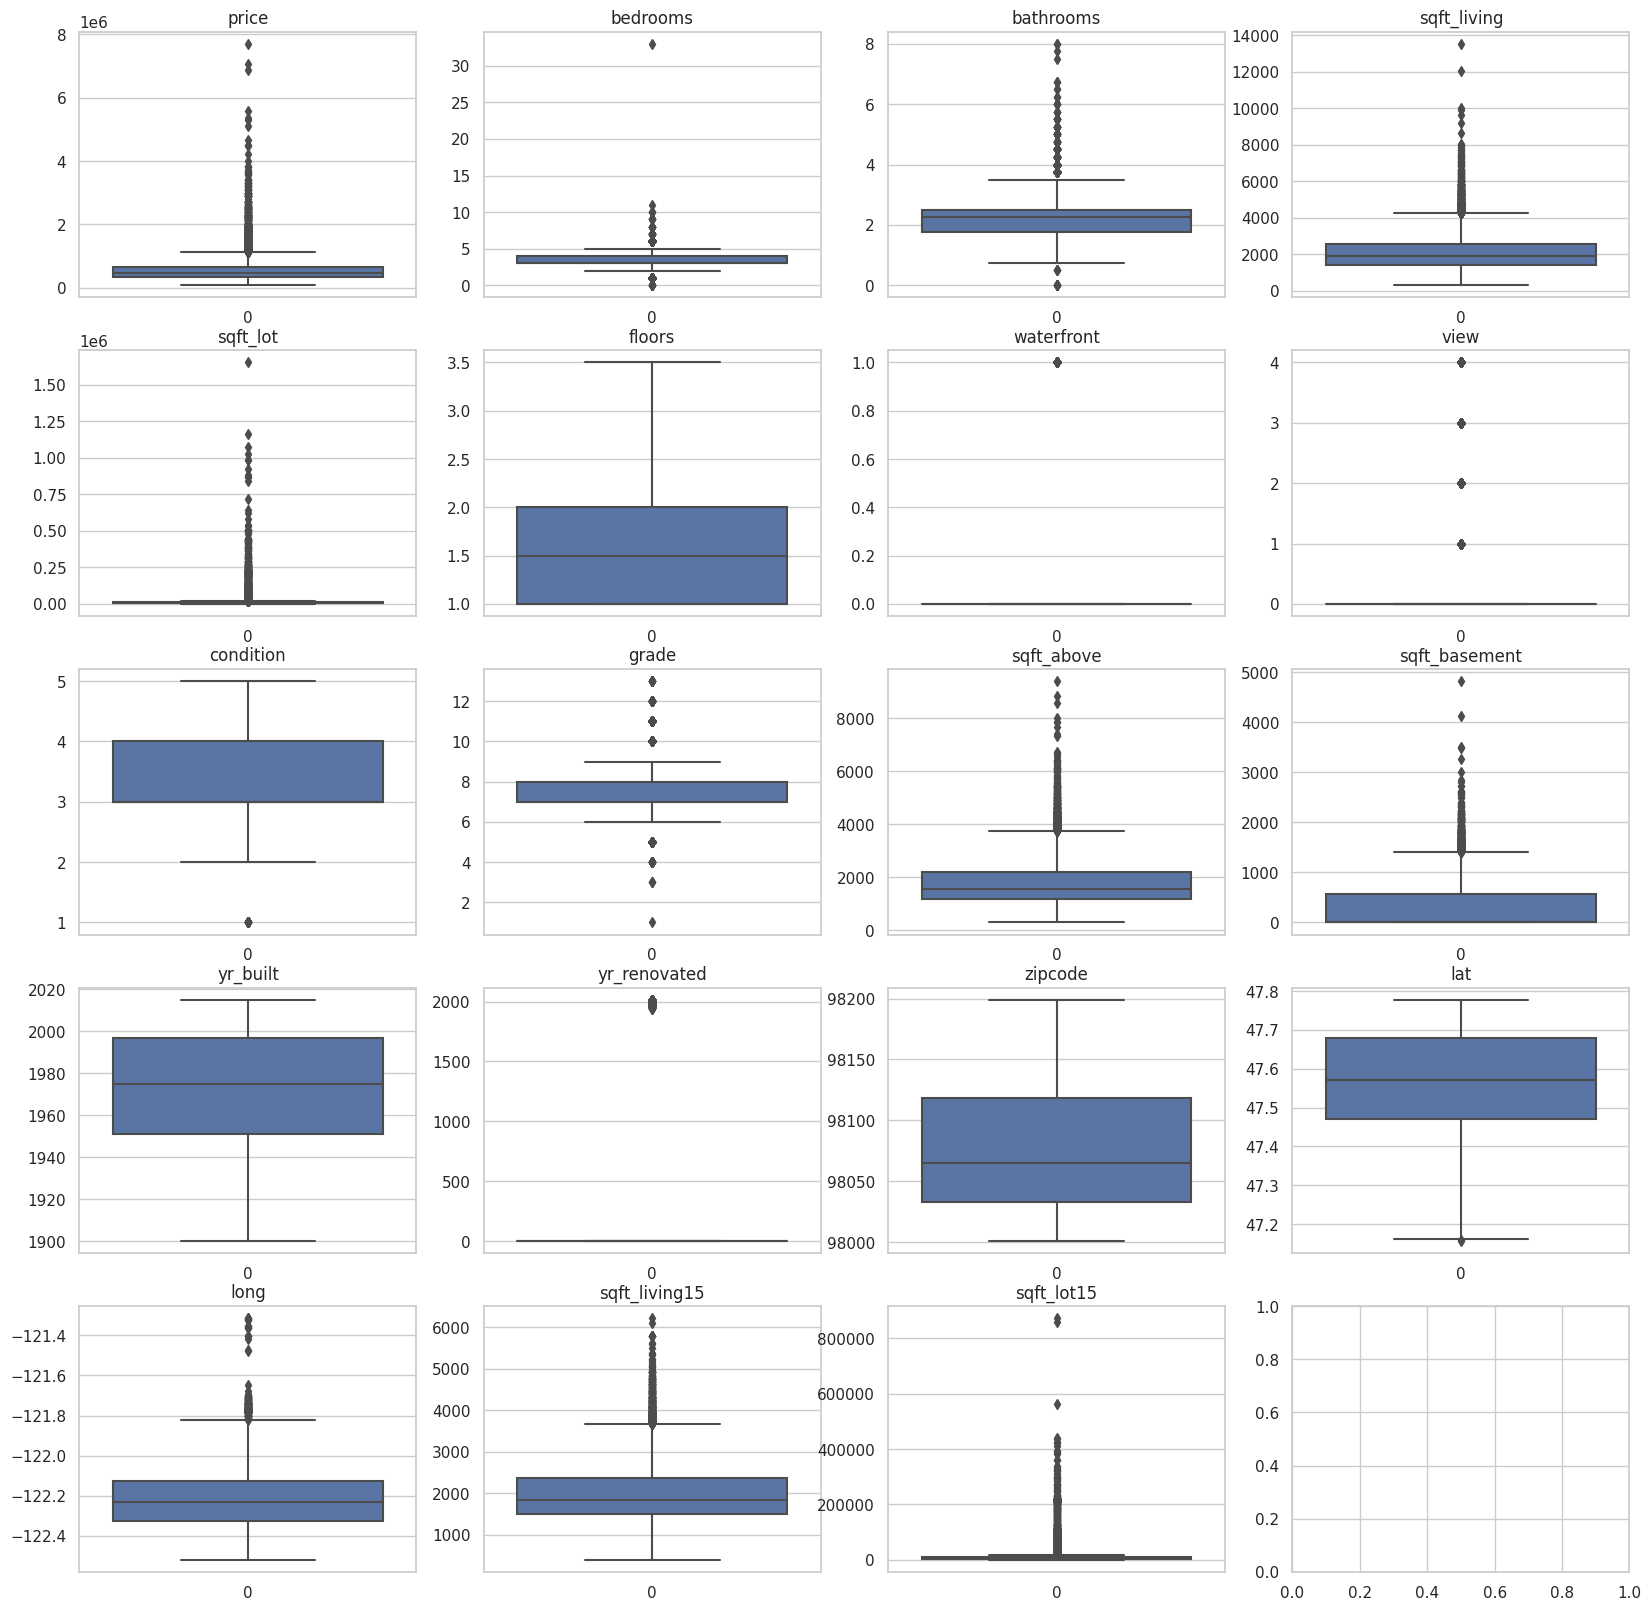

In [ ]:
# seaborn
fig, axes = plt.subplots(5, 4, figsize = (20,20))
col_cnt = 1
col_names = df.columns.tolist()
for name in col_names:
  if name != 'id' and name != 'date':
    plt.subplot(5, 4, col_cnt)
    sns.boxplot(df[name])
    plt.title(name)
    col_cnt += 1

In [ ]:
'''
[참고] boxplot 읽는 방법

     Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                  |-----:-----|
  o      |--------|     :     |--------|    o  o
                  |-----:-----|
outlier           <----------->           outliers
                       IQR

Q1-1.5IQR 과 Q3+1.5IQR을 각각 최소값과 최대값이라 지칭하고, Q1과 최소값, Q3와 최대값 사이 거리를 나타내는 선을 수염 (whisker)이라 한다.
실제 도식은 d>=Q1-1.5IQR 중 최소인 점, d<=Q3+1.5IQR 중 최대인 점에 선을 긋는다.
'''

lat(latitude, 위도)와 long(longitude, 경도)를 산점도로 그려보기

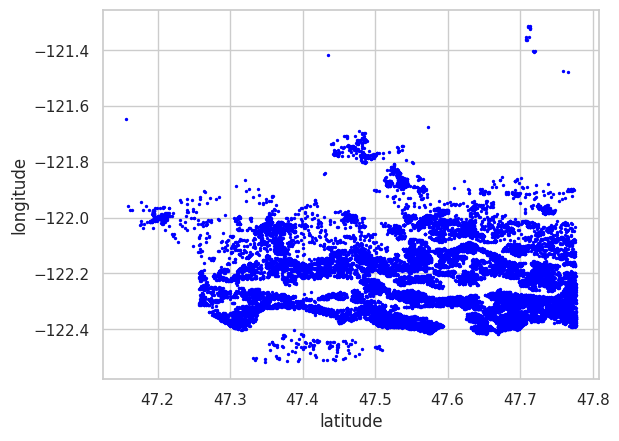

In [ ]:
# matplotlib
plt.scatter(x=df['lat'],y=df['long'],c='blue', s=2)
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()

<Axes: xlabel='lat', ylabel='long'>

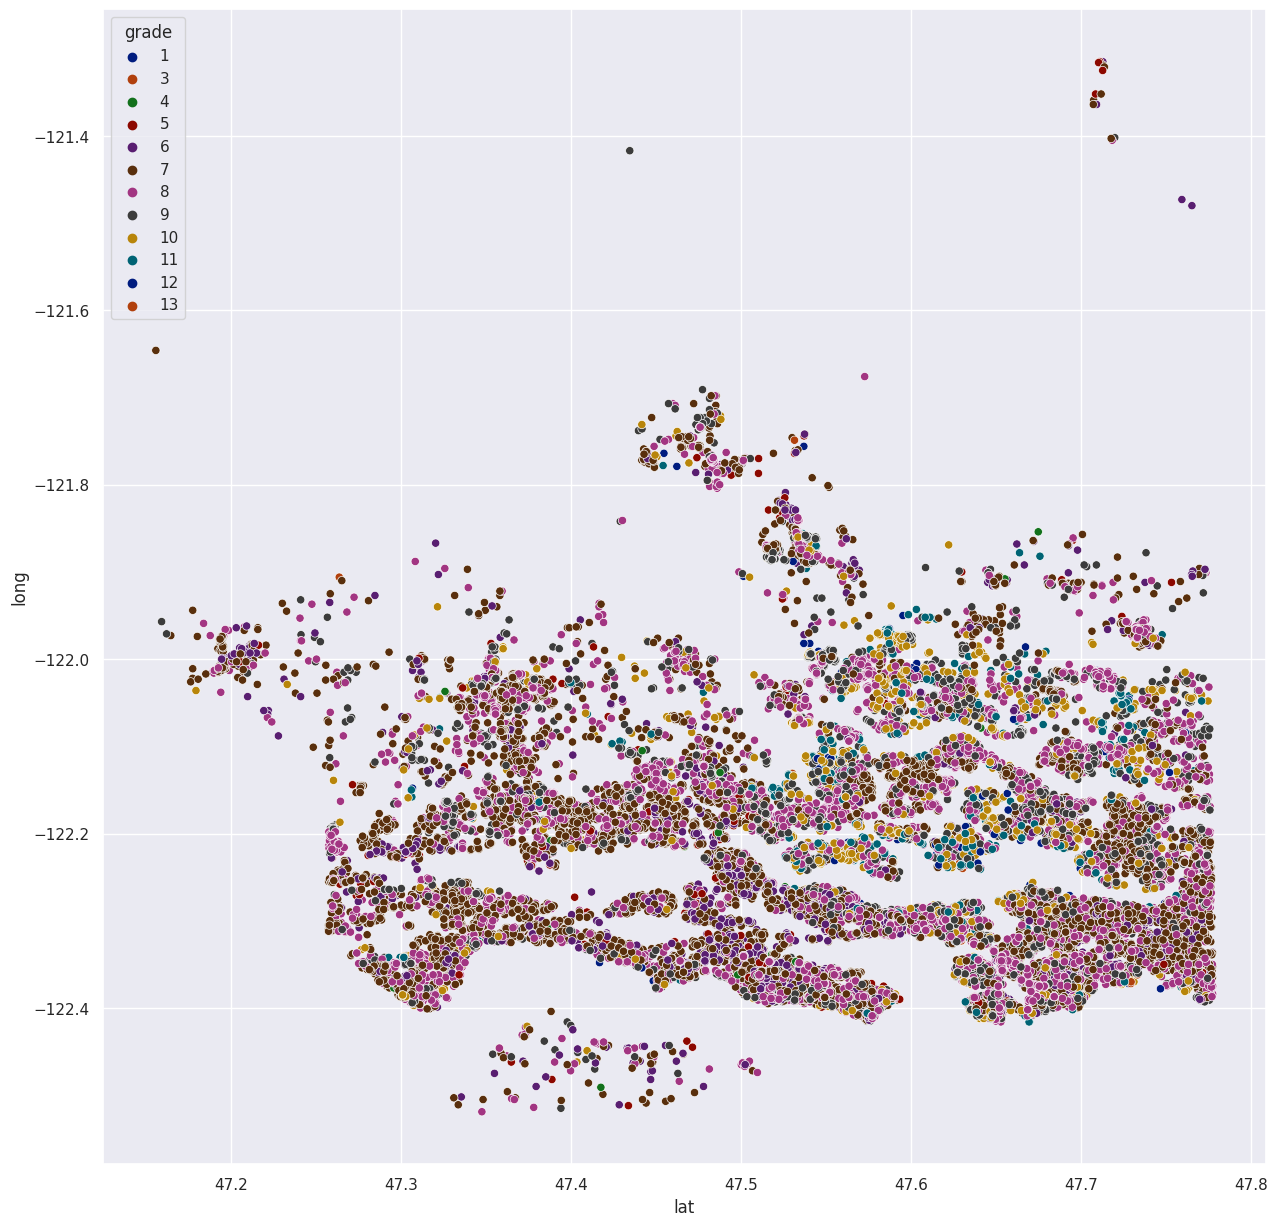

In [ ]:
# seaborn
sns.set_theme(style='darkgrid') # darkgrid, white, dark, ticks
sns.set(rc={'figure.figsize':(15,15)})
sns.scatterplot(x='lat',y='long',data=df, hue='grade', palette='dark') # palette : pastel, muted, bright, colorblind, deep, dark

In [ ]:
# 집들이 어디에 분포하고 있는지 지도를 로드해서 알아보기
import folium
# 위도
latitude = 47.5
# 경도
longitude = -121.8
m = folium.Map(location=[latitude, longitude],
               zoom_start=10,
               width=1000,
               height=1000
              )
for i in range(len(df)):
  if i % 10 == 0:
    folium.Marker([df['lat'][i], df['long'][i]]).add_to(m)
m

bedrooms에 따른 count로 원 그래프 그려보기

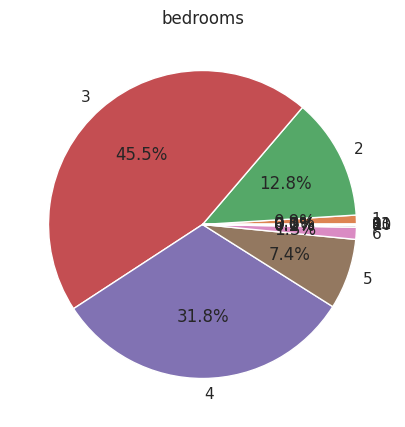

In [ ]:
# matplotlib
count = df.groupby("bedrooms").size()
labels = count.to_dict().keys()
plt.figure(figsize = (10, 5))
plt.pie(count, labels = labels, autopct = '%.1f%%')
plt.title('bedrooms')
plt.show()

대부분이 2,3,4 부근에 몰려있음을 알 수 있다.

[실습] condition에 따른 count로 원 그래프를 그려보세요.

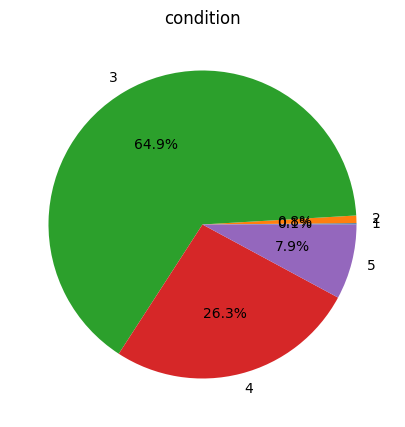

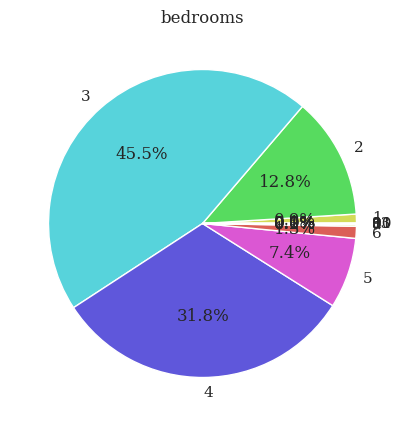

In [ ]:
# seaborn
sns.set_theme(palette="hls", font="serif", font_scale= 1)
# palette : deep, muted, bright, pastel, dark, colorblind, 이외 matplotlib colormap 등 더 있음
count = df.groupby("bedrooms").size()
labels = count.to_dict().keys()
plt.figure(figsize = (10, 5))
plt.pie(count, labels = labels, autopct = '%.1f%%')
plt.title('bedrooms')
plt.show()

date를 월별로 그룹화하여 월별 평균 price의 그래프 그리기

In [ ]:
def month_group(date):
  return date[:6]
df["month"] = df["date"].apply(lambda x : month_group(x))
df.sort_values(by='month')
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,201410
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,201412
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,201502
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,201412
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,201502
5,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,201405
6,1321400060,20140627T000000,257500,3,2.25,1715,6819,2.0,0,0,...,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,201406
7,2008000270,20150115T000000,291850,3,1.50,1060,9711,1.0,0,0,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,201501
8,2414600126,20150415T000000,229500,3,1.00,1780,7470,1.0,0,0,...,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,201504
9,3793500160,20150312T000000,323000,3,2.50,1890,6560,2.0,0,0,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,201503


In [ ]:
months = df.groupby("month").mean()
month_list = months.index.tolist()
yymm = []
for m in month_list:
  yymm.append(m[:4]+'.'+m[4:])
yymm

<ipython-input-4-c2c45929cd05>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  months = df.groupby("month").mean()


['2014.05',
 '2014.06',
 '2014.07',
 '2014.08',
 '2014.09',
 '2014.10',
 '2014.11',
 '2014.12',
 '2015.01',
 '2015.02',
 '2015.03',
 '2015.04',
 '2015.05']

In [ ]:
months

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
month,,,,,,,,,,,,,,,,,,,,
201405,4.628282e+09,548080.276584,3.389706,2.139847,2114.912896,15959.428167,1.493495,0.005656,0.247738,3.436086,7.724548,1797.126131,317.786765,1970.536765,118.639706,98079.101244,47.570395,-122.215372,2003.056561,12935.194005
201406,4.573257e+09,558002.199541,3.418349,2.163876,2132.820642,14260.094954,1.513303,0.008716,0.241743,3.460092,7.738532,1822.365138,310.455505,1970.741284,80.543119,98079.594495,47.565591,-122.214406,2035.218807,12842.035780
201407,4.578350e+09,544788.764360,3.391678,2.146540,2128.246495,13857.654907,1.522162,0.006784,0.221167,3.442786,7.716870,1841.531886,286.714609,1971.777024,92.125283,98074.758933,47.560198,-122.206664,2029.130710,12584.116689
201408,4.616929e+09,536445.276804,3.355670,2.123067,2084.762887,14636.380928,1.500258,0.006186,0.223196,3.440206,7.685567,1798.204639,286.558247,1972.058247,78.193814,98077.058247,47.564831,-122.209811,1995.676289,12960.812887
201409,4.458143e+09,529253.821871,3.360203,2.130919,2077.375986,15367.856257,1.490981,0.008455,0.248591,3.430665,7.640361,1785.519166,291.856821,1970.535513,99.047914,98078.445885,47.560565,-122.212648,1982.601466,11894.253100
201410,4.525103e+09,539026.971778,3.360490,2.118876,2083.896166,15489.720980,1.502929,0.008520,0.244409,3.411076,7.640043,1787.299255,296.596912,1970.119808,94.473376,98078.614483,47.562153,-122.217433,1981.560703,12989.555911
201411,4.523550e+09,521961.009213,3.333806,2.079376,2048.768958,15258.856130,1.500709,0.010631,0.221120,3.401843,7.610914,1775.916371,272.852587,1970.090716,87.574061,98078.540043,47.557782,-122.218147,1940.676825,12954.836286
201412,4.559764e+09,524461.866757,3.390891,2.102991,2091.339225,15330.740313,1.487084,0.008158,0.216859,3.394969,7.657376,1787.078858,304.260367,1971.276003,77.410605,98077.550646,47.559581,-122.220801,1976.046907,13091.547247
201501,4.574031e+09,525870.889571,3.387526,2.129346,2085.094070,17869.721881,1.478528,0.008180,0.246421,3.347648,7.642127,1814.019427,271.074642,1971.749489,73.433538,98077.897751,47.553500,-122.212188,1975.859918,12687.026585


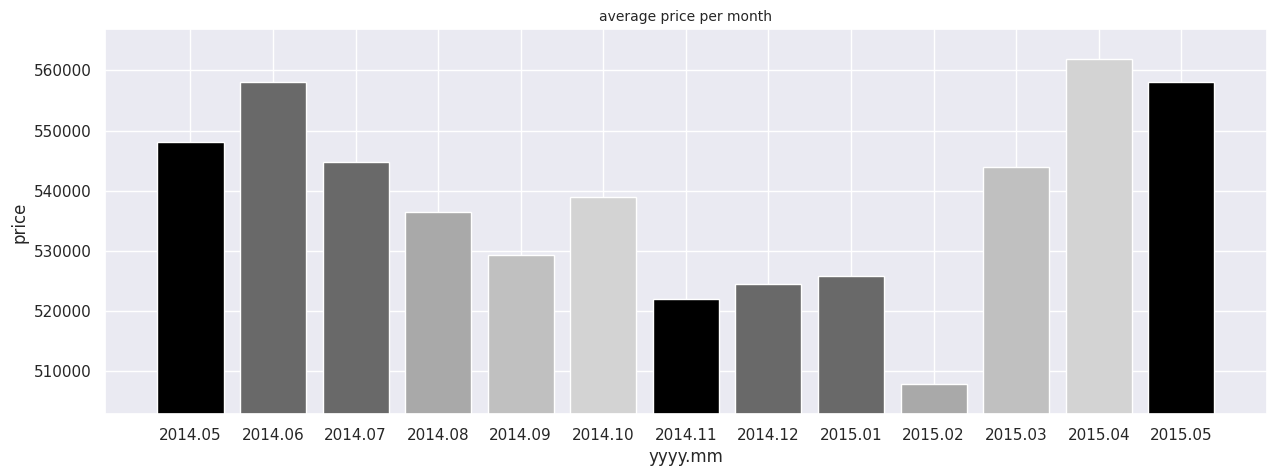

In [ ]:
# matplotlib, 막대그래프
plt.figure(figsize = (15,5))
colors = ['black','dimgray','dimgrey','darkgray','silver','lightgrey']
max_y_lim = max(months['price'])+5000
min_y_lim = min(months['price'])-5000
plt.ylim(min_y_lim, max_y_lim)
plt.bar(yymm, months['price'], color=colors, width=0.8)
plt.title('average price per month',fontsize=10)
plt.xlabel('yyyy.mm')
plt.ylabel('price')
plt.show()

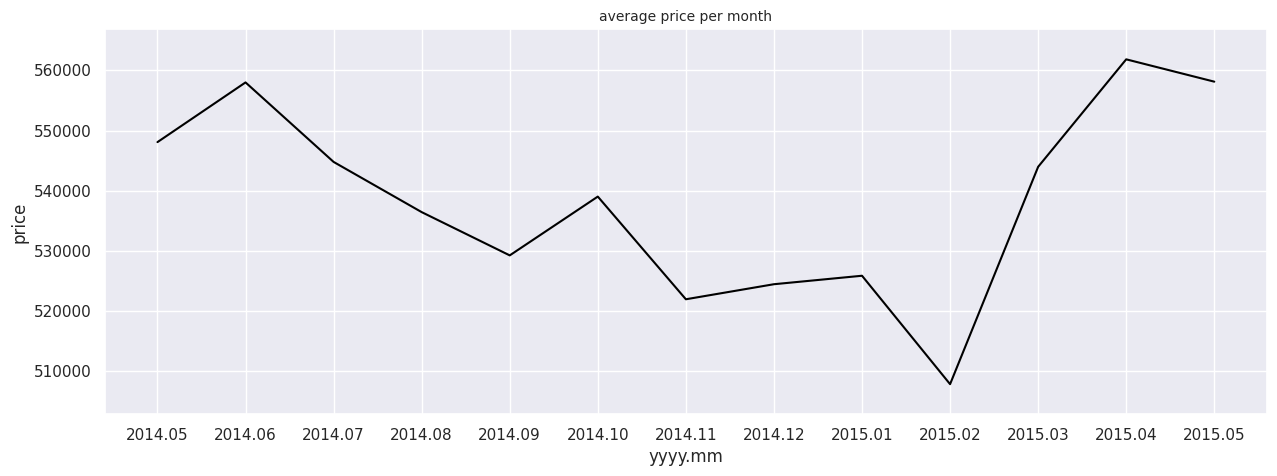

In [ ]:
# matplotlib, 선 그래프
plt.figure(figsize = (15,5))
max_y_lim = max(months['price']) + 5000
min_y_lim = min(months['price']) - 5000
plt.ylim(min_y_lim, max_y_lim)
plt.plot(yymm, months['price'], color='black')
plt.title('average price per month',fontsize=10)
plt.xlabel('yyyy.mm')
plt.ylabel('price')
plt.show()

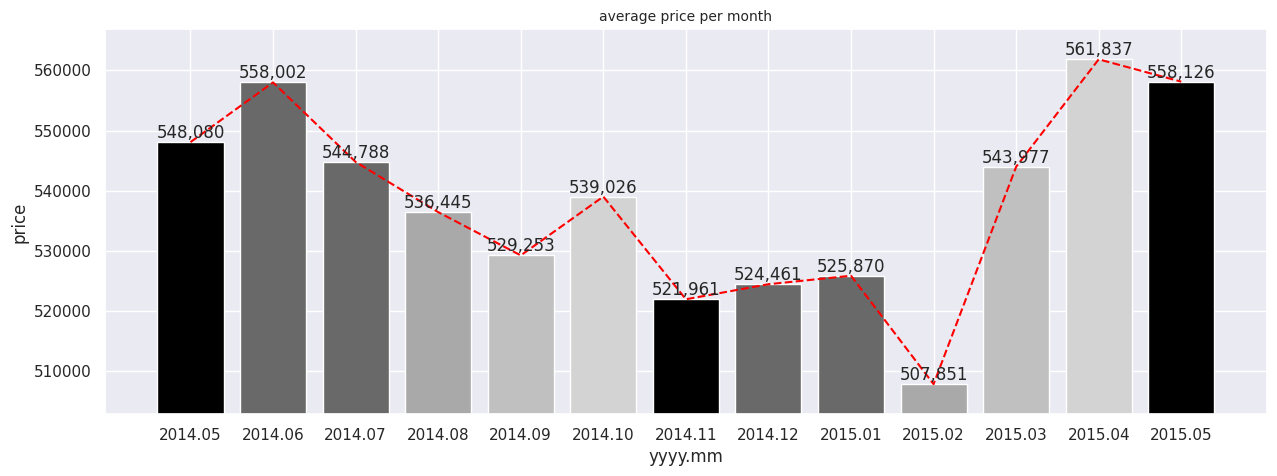

In [ ]:
# joint chart 출력
plt.figure(figsize = (15,5))
colors = ['black','dimgray','dimgrey','darkgray','silver','lightgrey']
max_y_lim = max(months['price'])+5000
min_y_lim = min(months['price'])-5000
plt.ylim(min_y_lim, max_y_lim)
plt.bar(yymm, months['price'], color=colors, width=0.8)
plt.plot(yymm, months['price'], color='red', linestyle='--')
plt.title('average price per month',fontsize=10)
plt.xlabel('yyyy.mm')
plt.ylabel('price')

# 막대 위에 값 레이블 출력
for i in range(len(yymm)):
    plt.text(yymm[i], int(months['price'][i]), format(int(months['price'][i]),','), ha='center', va='bottom')

plt.show()

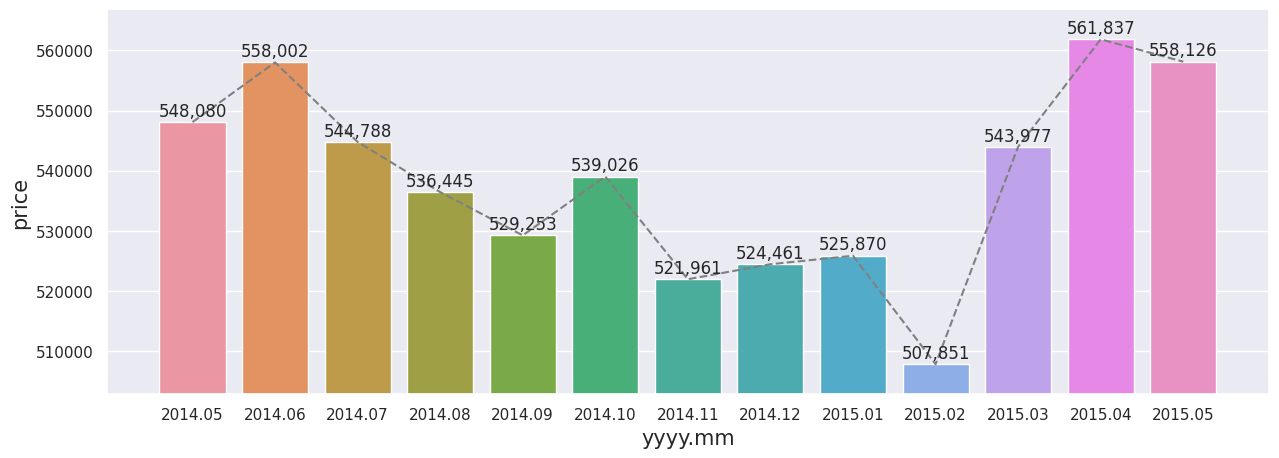

In [ ]:
# seaborn
sns.set_theme(style="whitegrid") ## figure, axes 스타일
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(x=yymm, y=months['price']) ## 바 차트 생성
ax = sns.lineplot(x=yymm, y=months['price'], color='gray', linestyle='--') ## 라인 차트 생성
ax.set_ylim(min_y_lim, max_y_lim)

# 막대 위에 값 레이블 출력
for i in range(len(yymm)):
  rec = ax.patches[i] # 각 bar를 의미
  ax.text(x = rec.get_x() + rec.get_width()/2,   # get_x() : x축의 가장 왼쪽 부분, get_width() : 가로, get_height : 세로
              y = rec.get_height() + 1000,
              s =  format(int(months['price'][i]),','),
            ha = 'center')

ax.set_xlabel("yyyy.mm", fontsize = 15)
ax.set_ylabel("price", fontsize = 15)
plt.show()

[실습] grade에 따른 평균 bedroom의 갯수를 막대그래프로 그려 주세요. 모든 막대 밑에는 해당 grade가 있어야 하고, 막대의 값 레이블들은 소수점 둘째 자리까지 반올림하여 막대 바로 위에 출력해 주세요.

<ipython-input-131-f95573e13122>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grade = df.groupby("grade").mean()


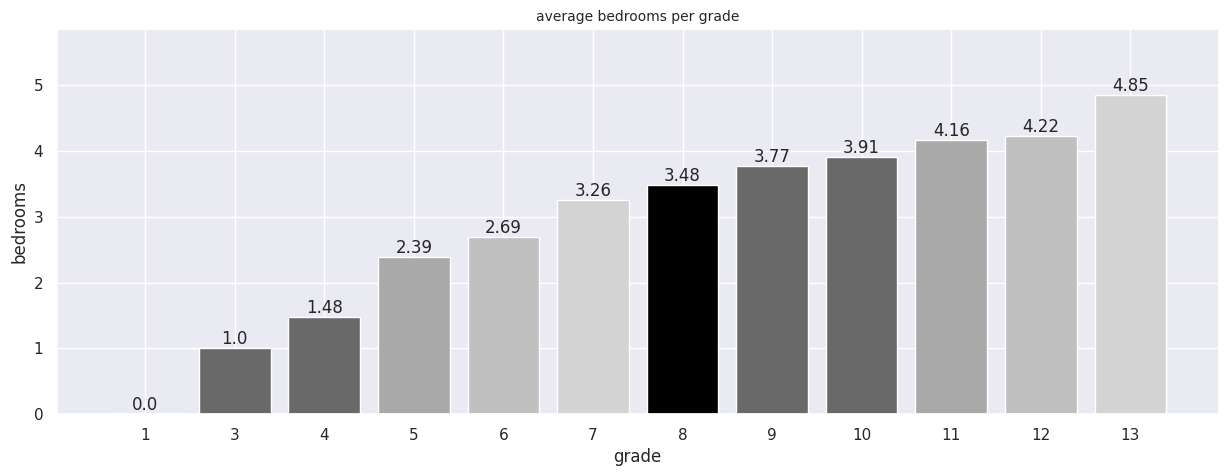

seaborn의 jointplot을 활용해 sqft_living과 sqft_lot의 관계 알아보기

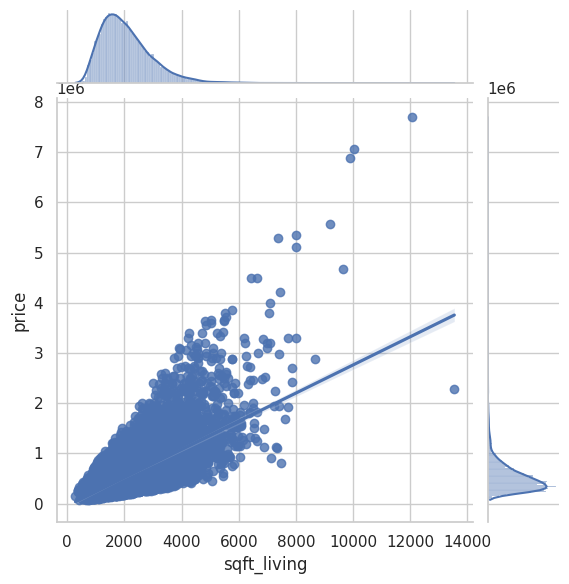

In [ ]:
sns.jointplot(x='sqft_living', y="price", data=df[["sqft_living", "price"]], kind="reg")

[참고] seaborn의 pairplot을 활용해 전체 컬럼 사이의 관계 확인

In [ ]:
sns.pairplot(df, diag_kind="kde");

Output hidden; open in https://colab.research.google.com to view.

seaborn으로 heatmap 그리기

In [ ]:
cols = df.columns.tolist()
cols

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

<Axes: >

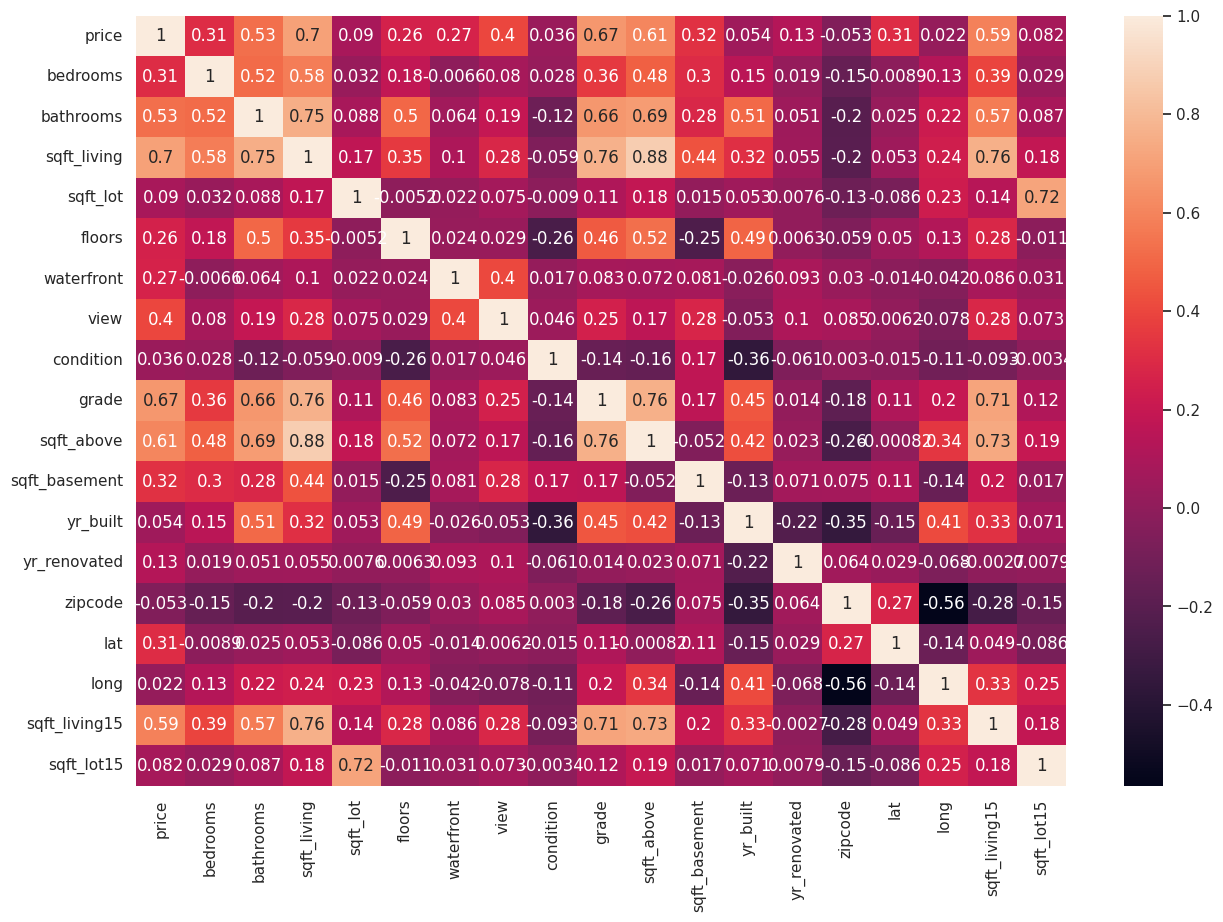

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
cols = df.columns.tolist()
cols.remove('id')
cols.remove('date')
sns.heatmap(df[cols].corr(), annot=True)

grade와 price 사이 관계를 알아보기 위한 violinplot 그리기

<Axes: title={'center': 'Grade and Price'}, xlabel='grade', ylabel='price'>

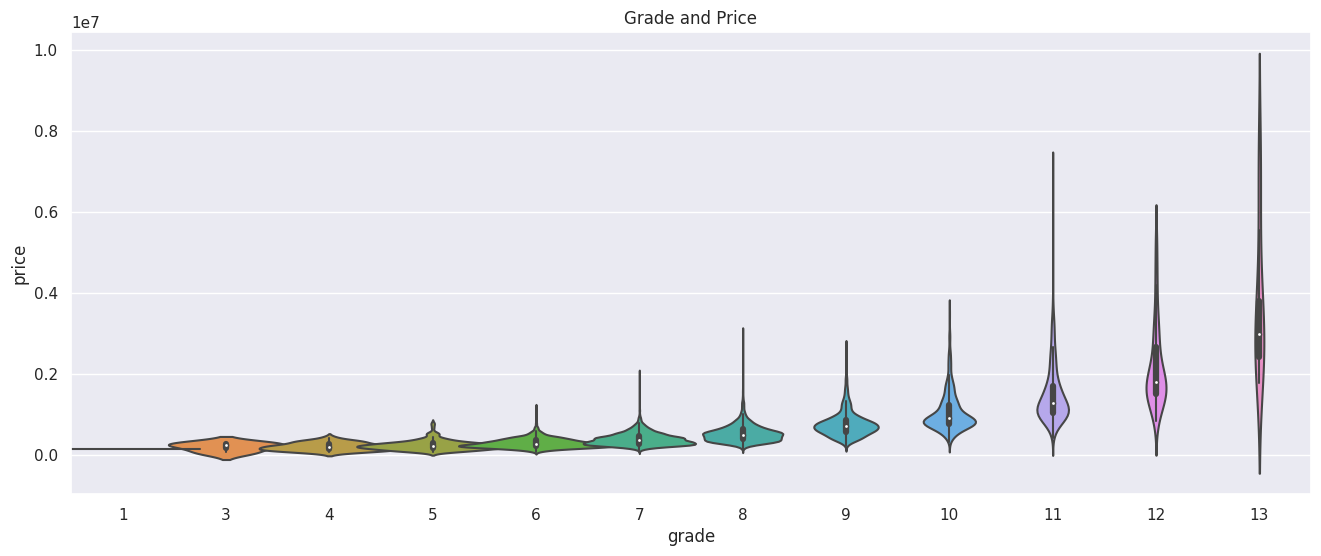

In [ ]:
plt.figure(figsize=(16, 6), label='grade and price')
plt.title('Grade and Price')
sns.violinplot(data=df, x="grade", y="price", width=1.5, )